<a href="https://colab.research.google.com/github/codelspak/Codelion_weekly_projects/blob/main/WK28_W9_Mini_project__Kaggle_DL_Regression_%EA%B5%AC%EB%82%B4%EC%8B%9D%EB%8B%B9_%EC%8B%9D%EC%88%98_%EC%9D%B8%EC%9B%90_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제상황
평가산식 : MAE(Mean Absolute Error)

# 1. 라이브러리 및 데이터 불러오기


In [1]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 5.1 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Codelion_weekly assignments/WK28_WK9_DL_구내식당 식수 인원 예측/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Codelion_weekly assignments/WK28_WK9_DL_구내식당 식수 인원 예측/test.csv')
submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Codelion_weekly assignments/WK28_WK9_DL_구내식당 식수 인원 예측/sample_submission.csv')

In [5]:
train.shape, test.shape, submit.shape

((1205, 12), (50, 10), (50, 3))

In [6]:
set(train.columns.tolist()) - set(test.columns.tolist()), submit.columns

({'석식계', '중식계'}, Index(['일자', '중식계', '석식계'], dtype='object'))

# 2. 데이터 EDA


In [7]:
train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [8]:
train.sample(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
719,2019-01-15,화,2985,71,223,417,0.0,"모닝롤/씨크립샌드 우유/주스 스크램블에그 닭죽/쌀밥 (쌀,닭:국내산) 근대국 땅...",쌀밥/잡곡밥 (쌀:국내산) 어묵국 등갈비김치말이 (등갈비:국내산) 해파리냉채 치...,"목살필라프 (쌀,돈육:국내산) 팽이가쯔오장국 로제파스타 키위드레싱샐러드 마늘빵...",963.0,569.0
908,2019-10-24,목,3121,129,313,410,0.0,모닝롤/식빵피자 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 꽃게된장국 동전...,쌀밥/잡곡밥 (쌀:국내산) 건새우아욱국 등갈비김치말이 계란말이 숙주나물무침 ...,해물굴소스볶음밥 (쌀:국내산) 맑은국 돈육간장강정 흑임자시금치샐러드 무우짱아찌...,705.0,409.0
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [10]:
# 컬럼 별 결측치 수 / 비율 확인 함수
def missing_values(dataframe) : 
    no_missing_values = dataframe.isnull().sum()
    prop_missing_values = round(dataframe.isnull().sum()/len(dataframe)*100,1)

    df_null = pd.concat([no_missing_values, prop_missing_values], axis = 1)
    df_null = df_null.rename(columns = {0:'결측치 수', 1:'결측치 비율'}, )

    return df_null

In [11]:
# 결측치 확인
missing_values(train)

,결측치 수,결측치 비율
일자,0,0.0
요일,0,0.0
본사정원수,0,0.0
본사휴가자수,0,0.0
본사출장자수,0,0.0
본사시간외근무명령서승인건수,0,0.0
현본사소속재택근무자수,0,0.0
조식메뉴,0,0.0
중식메뉴,0,0.0
석식메뉴,0,0.0


In [12]:
missing_values(test)

,결측치 수,결측치 비율
일자,0,0.0
요일,0,0.0
본사정원수,0,0.0
본사휴가자수,0,0.0
본사출장자수,0,0.0
본사시간외근무명령서승인건수,0,0.0
현본사소속재택근무자수,0,0.0
조식메뉴,0,0.0
중식메뉴,0,0.0
석식메뉴,0,0.0


In [13]:
# 기술통계 
train.describe().round(2)

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.00,1205.00,1205.00,1205.00,1205.00,1205.00,1205.00
mean,2807.82,157.91,241.14,274.12,43.51,890.33,461.77
std,171.26,144.19,43.53,246.24,109.94,209.51,139.18
min,2601.00,23.00,41.00,0.00,0.00,296.00,0.00
25%,2645.00,71.00,217.00,4.00,0.00,758.00,406.00
50%,2760.00,105.00,245.00,299.00,0.00,879.00,483.00
75%,2962.00,185.00,272.00,452.00,0.00,1032.00,545.00
max,3305.00,1224.00,378.00,1044.00,533.00,1459.00,905.00


In [14]:
train.describe(include = ['O'])


,일자,요일,조식메뉴,중식메뉴,석식메뉴
count,1205,1205,1205,1205,1205
unique,1205,5,1204,1198,1168
top,2016-02-01,목,모닝롤/프렌치토스트 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 무채국 김...,쌀밥/잡곡밥 (쌀:국내산) 시금치된장국 훈제오리구이 실곤약무침 무쌈/양파절임 ...,*
freq,1,244,2,2,19


날짜 관련 피쳐들

In [15]:
# 일자 
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20,3))
# sns.histplot(data = train[['일자', '중식계']], x = '일자', y = '중식계', ax = ax1)
# sns.histplot(data = train[['일자', '석식계']], x = '일자', y = '석식계',ax = ax2)
# plt.show()

In [16]:
# 날짜 관련 파생변수 생성1
train['연도'] = train.일자.map(lambda x : x.split("-")[0])
train['월'] = train.일자.map(lambda x : x.split("-")[1])
train['일'] = train.일자.map(lambda x : x.split("-")[2])
train.iloc[:3, -3:]

,연도,월,일
0,2016,02,01
1,2016,02,02
2,2016,02,03


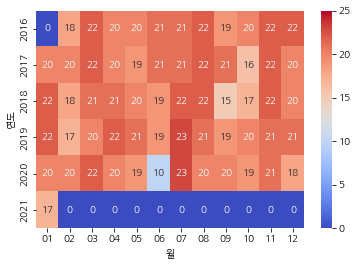

In [17]:
# 연월에 따른 데이터 샘플 수
sns.heatmap(pd.crosstab(index = train.연도, columns = train.월, margins = False), cmap = 'coolwarm', annot = True, vmin = 0, vmax = 25)

In [18]:
# 1601 제외하기 위해 파생변수
train['1601'] = train['일자'].str[:7] == '2016-01'
train['1601'].sample(3)

720    False
985    False
77     False
Name: 1601, dtype: bool

In [19]:
# 2018년 9월 데이터 : 그냥 14일부터 일주일 치 데이터가 누락되었음
train.loc[
          (train.연도 == '2018') & (train.월 == '09'), ['일자', '요일']
].value_counts()

일자          요일
2018-09-03  월     1
2018-09-04  화     1
2018-09-05  수     1
2018-09-06  목     1
2018-09-07  금     1
2018-09-10  월     1
2018-09-11  화     1
2018-09-12  수     1
2018-09-13  목     1
2018-09-14  금     1
2018-09-17  월     1
2018-09-18  화     1
2018-09-19  수     1
2018-09-20  목     1
2018-09-21  금     1
dtype: int64

In [20]:
# 2020년 6월 데이터 : 그냥 13일부터 2주치 데이터가 누락되었음
train.loc[
          (train.연도 == '2020') & (train.월 == '06'), ['일자', '요일']
].value_counts()

일자          요일
2020-06-01  월     1
2020-06-02  화     1
2020-06-03  수     1
2020-06-04  목     1
2020-06-05  금     1
2020-06-08  월     1
2020-06-09  화     1
2020-06-10  수     1
2020-06-11  목     1
2020-06-12  금     1
dtype: int64

In [21]:
# 2020년 12월 데이터 : 28일부터 일주일치 데이터 누락되었음
train.loc[
          (train.연도 == '2020') & (train.월 == '12'), ['일자', '요일']
].value_counts().sort_index()

일자          요일
2020-12-01  화     1
2020-12-02  수     1
2020-12-03  목     1
2020-12-04  금     1
2020-12-07  월     1
2020-12-08  화     1
2020-12-09  수     1
2020-12-10  목     1
2020-12-11  금     1
2020-12-14  월     1
2020-12-15  화     1
2020-12-16  수     1
2020-12-17  목     1
2020-12-18  금     1
2020-12-21  월     1
2020-12-22  화     1
2020-12-23  수     1
2020-12-24  목     1
dtype: int64

위 테이블의 값은 '샘플 수' 자체를 의미함<br>
1월 / 2월 / 5월 / 6월 / 9월 / 10월 / 12월엔 샘플 수가 약 10% 정도 적은 걸 알 수 있음. 16-20년 5개년 치 임을 고려했을 때, 매년 각 달에 약 2일씩 회사가 쉬었음을 알 수 있음. 그 이유는 다음과 같음.<br>
1. 1월 / 9월 / 10월 : 설날, 추석
2. 2월 : 그냥 다른 달에 비해 일수 자체가 적음
3. 5월 : 근로자의 날, 어린이 날, 부처님 오신 날 등 공휴일이 많음
4. 6월 : **2020년 데이터가 이상**함. 누락된 것 같음. 
    - 근데 결측치 없었음. 따라서 값들에 0 등 의미없는 값이 있는지 확인이 필요할 것 같음
5. 12월 : 2020년 데이터만 추가로 확인해보자<br>
-> 일부 데이터가 누락된 건 확인했지만, 우리가 예측하려는 데이터와는 구간이 겹치지 않아 일단은 큰 문제가 되지 않으리라 판단함


In [22]:
train.loc[
          (train.연도 == '2020') & (train.월 == '02'), ['중식계', '석식계']
].sort_values('중식계', ascending = True).head()

,중식계,석식계
980,539.0,326.0
990,627.0,380.0
979,637.0,369.0
978,660.0,276.0
995,750.0,414.0


In [23]:
def heatmap_label_value_and_ratio(df,index_col_name, columns_col_name, values_col_name):
    # 과학적 표기법 제거
    pd.options.display.float_format = '{:.2f}'.format
    # 연도*월 별 본사정원수 total
    df_staff_by_year = df.groupby([columns_col_name, index_col_name])['본사정원수'].sum().unstack().fillna(0)
    
    # 연도*월 별 중식계/석식계 평균 인원
    no_table = pd.crosstab(index = df[index_col_name], columns = df[columns_col_name], values = df[values_col_name], 
                           aggfunc = 'mean',).round(1).sort_index(ascending = True).T
    # 연도*월 별, 전체 인원 대비 중식계/석식계 비율
    ratio_table = pd.crosstab(index = df[index_col_name], columns = df[columns_col_name], values = df[values_col_name], 
                              aggfunc = 'sum',).round(1).sort_index(ascending = True).T
    for year in no_table.index.tolist():
        for month in no_table.columns.tolist():
            no_staff = int(df_staff_by_year.loc[year, month])
            ratio_table.loc[year, month] = ratio_table.loc[year, month]/no_staff

    ratio_table = ratio_table*100
    
    # 평균 인원 / 전체인원 대비 비율 시각화
    plt.subplots(1,2, figsize = (20,5))
    plt.subplot(1,2,1)
    sns.heatmap(no_table, cmap = 'coolwarm', annot = True, fmt = ',.1f')

    plt.subplot(1,2,2)
    sns.heatmap(ratio_table, cmap = 'coolwarm', annot = True, fmt = ',.3f')


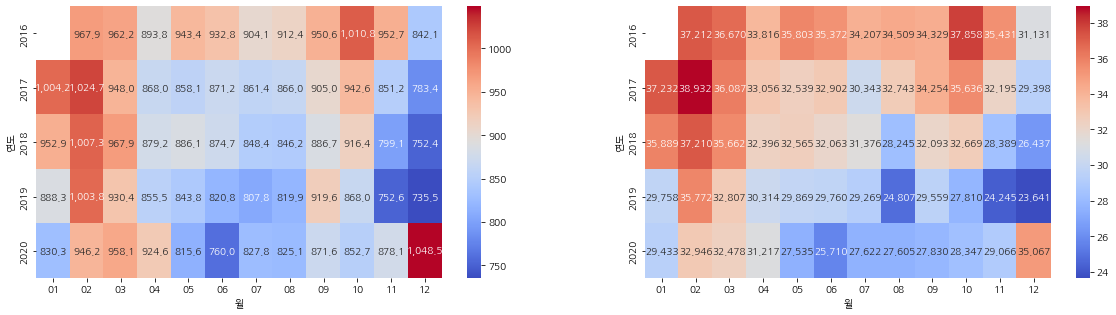

In [24]:
# 월별 중식
heatmap_label_value_and_ratio(train[(train['연도']!='2021') & (train['1601']==False)],'월', '연도', '중식계')

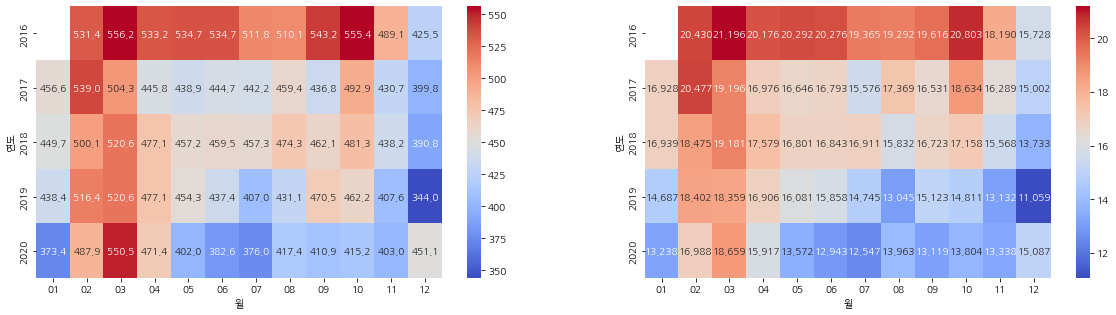

In [25]:
# 월별 석식
heatmap_label_value_and_ratio(train[(train['연도']!='2021') & (train['1601']==False)],'월', '연도', '석식계')

In [26]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,연도,월,일,1601
0,2016-02-01,월,2601,50,150,238,0.00,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.00,331.00,2016,02,01,False
1,2016-02-02,화,2601,50,173,319,0.00,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.00,560.00,2016,02,02,False
2,2016-02-03,수,2601,56,180,111,0.00,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.00,573.00,2016,02,03,False
3,2016-02-04,목,2601,104,220,355,0.00,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.00,525.00,2016,02,04,False
4,2016-02-05,금,2601,278,181,34,0.00,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.00,330.00,2016,02,05,False


In [27]:
# 날짜 관련 파생변수 생성2 : 계절 - 얘는 샘플 수 보다는, 근무 인원 대비 중식계/석식계 숫자 분포에 영향을 미치는 피처가 될 듯
dict_season = {'01':'1. 겨울', '02':'1. 겨울', '03':'2. 봄', '04':'2. 봄', '05':'2. 봄', '06':'3. 여름', '07':'3. 여름', '08':'3. 여름', '09':'4. 가을', '10':'4. 가을', '11':'4. 가을', '12':'5. 겨울', }
train['계절'] = train.월.map(lambda x : dict_season[x])
train.iloc[:3, :-4]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,연도
0,2016-02-01,월,2601,50,150,238,0.00,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.00,331.00,2016
1,2016-02-02,화,2601,50,173,319,0.00,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.00,560.00,2016
2,2016-02-03,수,2601,56,180,111,0.00,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.00,573.00,2016


### 본사 근무 인원 관련 피쳐들

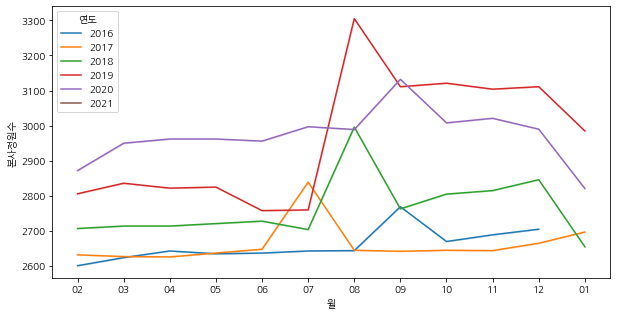

In [28]:
# 본사 정원수
plt.figure(figsize = (10, 5))
sns.lineplot(data = train, x = '월', y = '본사정원수', hue = '연도', )
plt.show()

In [29]:
# 일자에 따른 정원 수 변동은 없음 - 무조건 월 기준
train.groupby(by = ['연도', '월'], as_index = False)['본사정원수'].nunique()['본사정원수'].unique()

array([1])

In [30]:
# 공통적으로 여름에 정원이 튀는 게 이상함. 신입사원 채용 등의 이유인지 확인하기 위해, 제일 이상한 2019년 / 2020년 데이터 비교해보기로 함
train.loc[
          (train.연도=='2019') & (train.월.isin(['07', '08'])) & (train.본사정원수>3000),:'현본사소속재택근무자수'].sort_values('일자', ascending = True)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
854,2019-08-01,목,3305,546,219,285,0.00
855,2019-08-02,금,3305,687,237,2,0.00
856,2019-08-05,월,3305,462,183,392,0.00
857,2019-08-06,화,3305,427,203,392,0.00
858,2019-08-07,수,3305,421,233,1,0.00
859,2019-08-08,목,3305,430,254,364,0.00
860,2019-08-09,금,3305,496,261,3,0.00
861,2019-08-12,월,3305,394,208,424,0.00
862,2019-08-13,화,3305,345,254,411,0.00
863,2019-08-14,수,3305,430,246,2,0.00


In [31]:
train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,연도,월,일,1601,계절
0,2016-02-01,월,2601,50,150,238,0.00,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.00,331.00,2016,02,01,False,1. 겨울
1,2016-02-02,화,2601,50,173,319,0.00,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.00,560.00,2016,02,02,False,1. 겨울
2,2016-02-03,수,2601,56,180,111,0.00,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.00,573.00,2016,02,03,False,1. 겨울


본사 인원 관련 EDA 결론<BR>
1. 본사휴가자수 : 연도 상관없이 금요일에 휴가자 수가 높은 경향을 보임
    - 2016-2018 대비 2019-2020 휴가자 수가 증가함 (약 30%)
    - 2021 : 휴가자 수가 급감
2. 본사출장자수 : 연도 상관없이 월요일에 출장자 수가 낮고, 금요일에 높은 경향을 보임
    - 2016-2019 : 월요일 - 출장자 수 낮음 / 화-금요일 = 촐장자 수 증가
    - 2019-2020 : 월-화요일 - 출장자 수 낮음 / 수-금요일 - 출장자 수 증가
3. 본사시간외근무명령서승인건수 : 월-화요일 오버타임 높고, 수/금요일 오버타임 거의 없음
    - 2016-2018 대비 2019-2020 년에 오버타임  근무자가 높고, 낮아지는 경향을 보임
4. 현본사소속재택근무자수 : 재택이 시작한 이래로, 금요일에 재택율이 낮은 경향을 보임
    - 2016-2019 : 재택근무 아예 없었음
    - 2020/2021 : 재택근무 해마다 증가하는 경향을 보임 

In [32]:
def heatmap_by_day_value_and_ratio(df,index_col_name, columns_col_name, values_col_name, index_order):
    # 과학적 표기법 제거
    pd.options.display.float_format = '{:.2f}'.format
    # 연도*월 별 본사정원수 total
    df_staff_by_year = df.groupby([columns_col_name, index_col_name])['본사정원수'].sum().unstack().fillna(0).rename(columns = index_order)
    
    # temp_sum : ratio, temp_mean : value
    ratio_table = pd.crosstab(index = df[index_col_name], columns = df[columns_col_name], values = df[values_col_name], 
                              aggfunc = 'sum', margins = True ).round(1).rename(index = index_order).sort_index(ascending = True).T
    no_table = pd.crosstab(index = df[index_col_name], columns = df[columns_col_name], values = df[values_col_name], 
                           aggfunc = 'mean', margins = True ).round(1).rename(index = index_order).sort_index(ascending = True).T
    ratio_by_staff = ratio_table.copy()

    # 연도 * 월 별 value
    plt.subplots(1,3, figsize = (27,5))
    plt.subplot(1,3,1)
    sns.heatmap(no_table.iloc[:, :-1], cmap = 'coolwarm', annot = True, fmt = ',.1f')
    # 연도 별 전체 value값 대비, 월 별 비율
    for index in ratio_table.index.tolist():
        ratio_table.loc[index] = ratio_table.loc[index]/float(ratio_table.loc[index, 'All'])

    plt.subplot(1,3,2)
    sns.heatmap(ratio_table.iloc[:, :-1], cmap = 'summer_r', annot = True, fmt = ',.3f')
    # 연도 * 월 별 전체 인원 대비, value값의 비율
    ratio_by_staff = ratio_by_staff.iloc[:-1, :-1]
    for year in ratio_by_staff.index.tolist():
        for day in ratio_by_staff.columns.tolist():
            no_staff = int(df_staff_by_year.loc[year, day])
            ratio_by_staff.loc[year, day] = ratio_by_staff.loc[year, day]/no_staff
    ratio_table = ratio_table*100
    plt.subplot(1,3,3)
    sns.heatmap(ratio_by_staff, cmap = 'coolwarm', annot = True, fmt = ',.1f')


그래프 : 
(1) 각 연도*요일 별 평균 인원 수 
(2) 월 별 비율 (per 연도 별 해당 인원) 
(3) 월 별 비율 (per 연도*월 별 전체 인원 수)

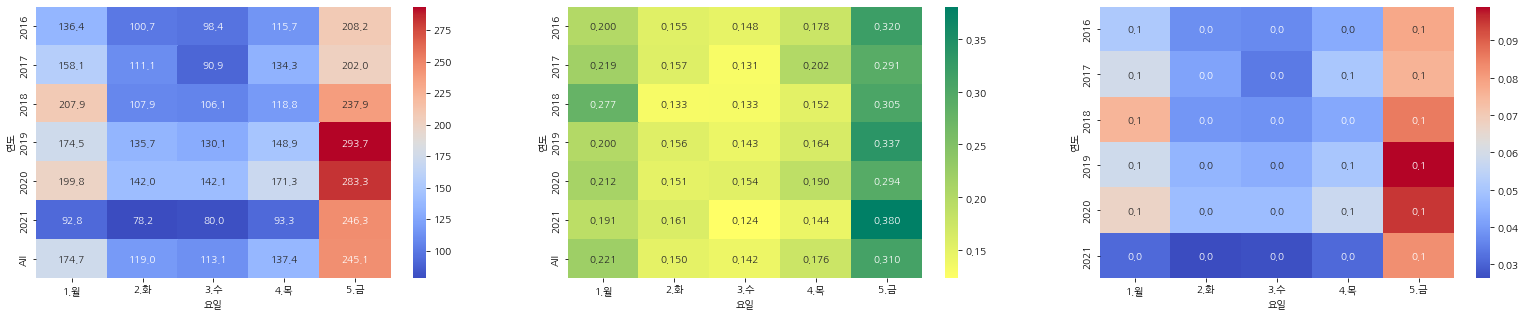

In [33]:
# 본사휴가자수 (-)
index_order = {'월':'1.월', '화':'2.화', '수':'3.수', '목':'4.목', '금':'5.금'}
heatmap_by_day_value_and_ratio(train,'요일', '연도', '본사휴가자수', index_order)

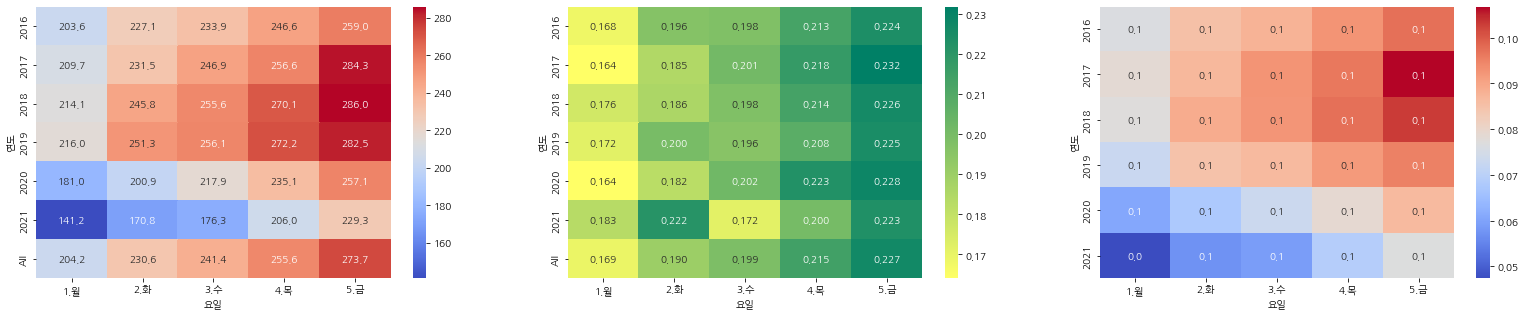

In [34]:
# 본사출장자수 : (-) - 경험 상, 누가 출장오면 오히려 다 같이 외식하러 감
heatmap_by_day_value_and_ratio(train,'요일', '연도', '본사출장자수', index_order)


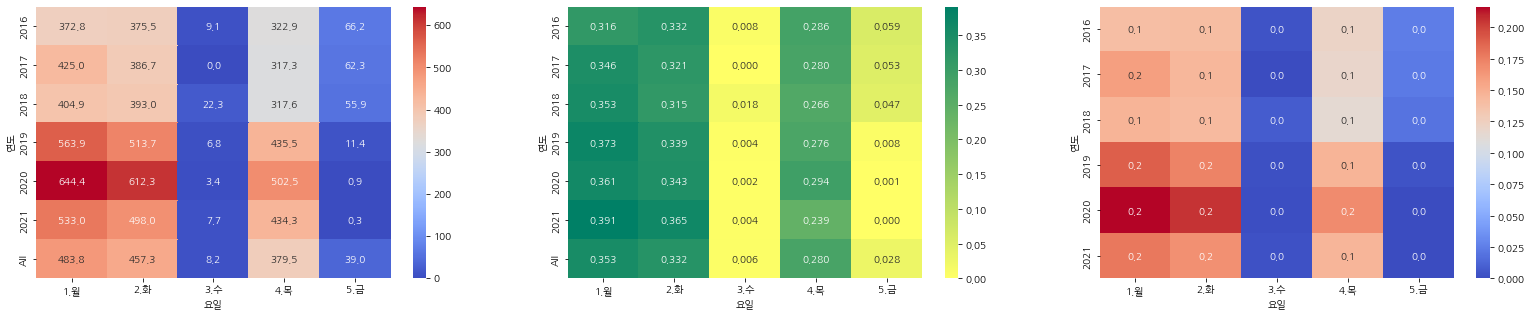

In [35]:
# 본사시간외근무명령서승인건수 (+)
heatmap_by_day_value_and_ratio(train,'요일', '연도', '본사시간외근무명령서승인건수', index_order)


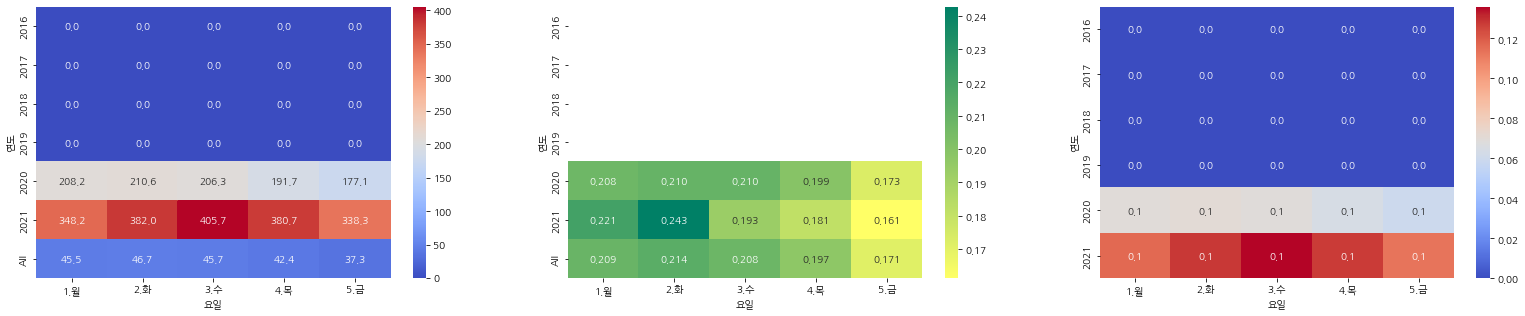

In [36]:
# 현본사소속재택근무자수 (-)
heatmap_by_day_value_and_ratio(train,'요일', '연도', '현본사소속재택근무자수', index_order)


본사 인원 관련 EDA 결론 (계절에 따른)

1. 본사휴가자수 : 연도 상관없이 여름에 휴가자 수가 높음
    - 2016-2018 대비 2019-2020 전체적으로 휴가자 수가 증가함 
2. 본사출장자수 : 연도 상관없이 봄, 가을에 대체로 출장자 수가 높음
    - 2016-2019 : 월요일 - 출장자 수 낮음 / 화-금요일 = 촐장자 수 증가
    - 2019-2020 : 월-화요일 - 출장자 수 낮음 / 수-금요일 - 출장자 수 증가
3. 본사시간외근무명령서승인건수 : 여름에 대체로 오버타임 근무가 낮아지는 경향을보임
    - 2016-2018 대비 2019-2020 년에 오버타임 근무자가 높아지는 경향을 보임
4. 현본사소속재택근무자수 : 여름, 겨울에 재택이 낮다
    - 2016-2019 : 재택근무 아예 없었음
    - 2020/2021 : 재택근무 해마다 증가하는 경향을 보임

In [37]:
def heatmap_by_season_value_and_ratio(df,index_col_name, columns_col_name, values_col_name):
    # 과학적 표기법 제거
    pd.options.display.float_format = '{:.2f}'.format
    # 연도*월 별 본사정원수 total
    df_staff_by_year = df.groupby([columns_col_name, index_col_name])['본사정원수'].sum().unstack().fillna(0)
    
    # temp_sum : ratio, temp_mean : value
    ratio_table = pd.crosstab(index = df[index_col_name], columns = df[columns_col_name], values = df[values_col_name], 
                              aggfunc = 'sum', margins = True ).round(1).sort_index(ascending = True).T
    no_table = pd.crosstab(index = df[index_col_name], columns = df[columns_col_name], values = df[values_col_name], 
                           aggfunc = 'mean', margins = True ).round(1).sort_index(ascending = True).T
    ratio_by_staff = ratio_table.copy()

    # 연도 * 계절 별 value
    plt.subplots(1,3, figsize = (27,5))
    plt.subplot(1,3,1)
    sns.heatmap(no_table.iloc[:, :-1], cmap = 'coolwarm', annot = True, fmt = ',.1f')
    # 연도 별 전체 value값 대비, 계절 별 비율
    for index in ratio_table.index.tolist():
        ratio_table.loc[index] = ratio_table.loc[index]/float(ratio_table.loc[index, 'All'])

    plt.subplot(1,3,2)
    sns.heatmap(ratio_table.iloc[:, :-1], cmap = 'summer_r', annot = True, fmt = ',.3f')
    # 연도 * 시즌 별 전체 인원 대비, value값의 비율
    ratio_by_staff = ratio_by_staff.iloc[:-1, :-1]
    for year in ratio_by_staff.index.tolist():
        for season in ratio_by_staff.columns.tolist():
            no_staff = int(df_staff_by_year.loc[year, season])
            ratio_by_staff.loc[year, season] = ratio_by_staff.loc[year, season]/no_staff
    ratio_table = ratio_table*100
    plt.subplot(1,3,3)
    sns.heatmap(ratio_by_staff, cmap = 'coolwarm', annot = True, fmt = ',.2f')


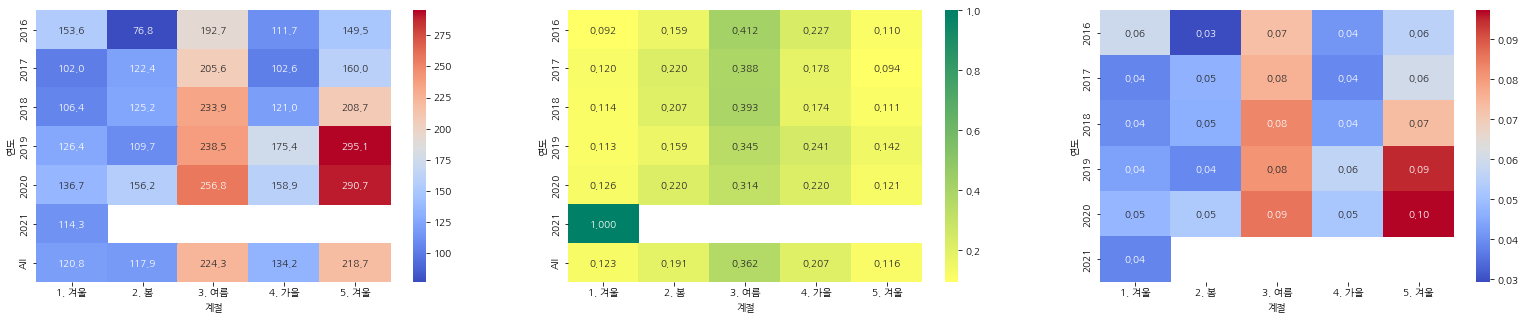

In [38]:
# 계절에 따른 변화도 있을까
# index_order =  {'봄':'2.봄', '여름':'3.여름', '가을':'4.가을', '겨울':'1.겨울'}
heatmap_by_season_value_and_ratio(train,'계절', '연도', '본사휴가자수')

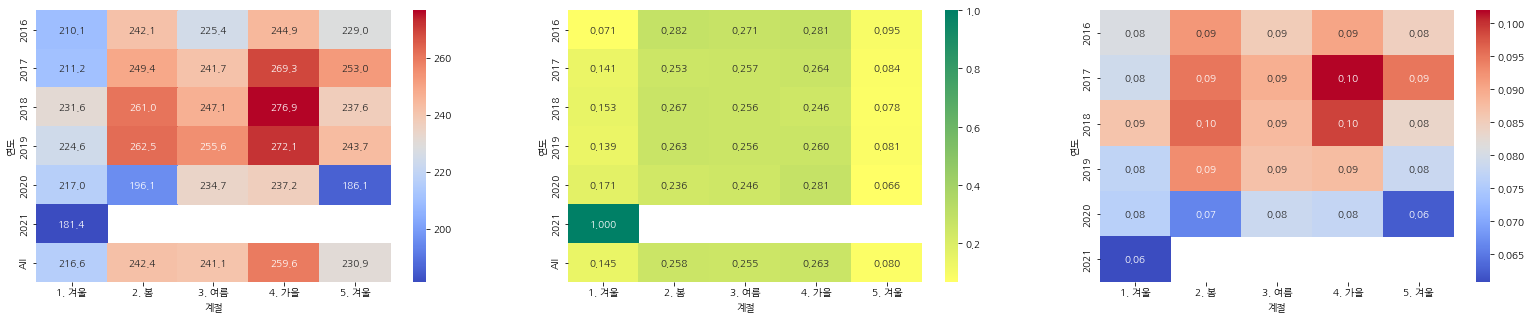

In [39]:
# 본사출장자수
heatmap_by_season_value_and_ratio(train,'계절', '연도', '본사출장자수')

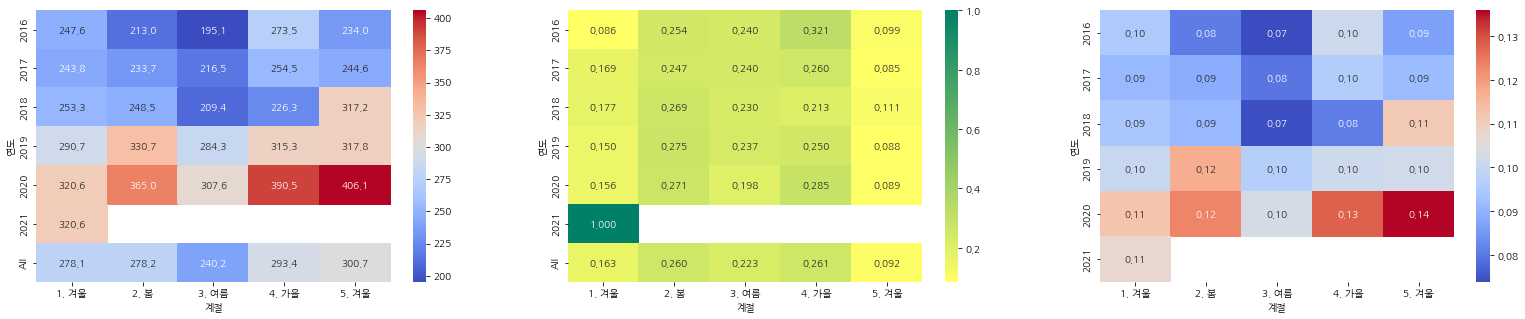

In [40]:
# 본사시간외근무명령서승인건수
heatmap_by_season_value_and_ratio(train,'계절', '연도', '본사시간외근무명령서승인건수')


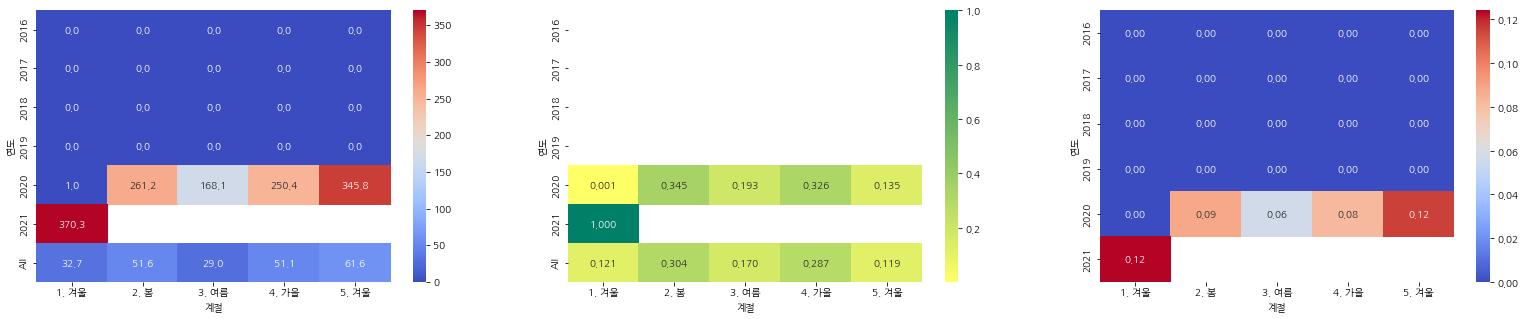

In [41]:
# 현본사소속재택근무자수
heatmap_by_season_value_and_ratio(train,'계절', '연도', '현본사소속재택근무자수')


### 메뉴 관련 피쳐들

In [42]:
# 조식메뉴
train.조식메뉴.unique().tolist()

['모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐어채무침  포기김치 (배추,고추가루:국내산) ',
 '모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌개  시래기조림  포기김치 (배추,고추가루:국내산) ',
 '모닝롤/베이글  우유/두유/주스 계란후라이  표고버섯죽/쌀밥 (쌀:국내산) 콩나물국  느타리호박볶음  포기김치 (배추,고추가루:국내산) ',
 '모닝롤/토마토샌드  우유/두유/주스 계란후라이  닭죽/쌀밥 (쌀,닭:국내산) 근대국  멸치볶음  포기김치 (배추,고추가루:국내산) ',
 '모닝롤/와플  우유/두유/주스 계란후라이  쇠고기죽/쌀밥 (쌀:국내산) 재첩국  방풍나물  포기김치 (배추,고추가루:국내산) ',
 '팬케익/찐빵  우유/두유/주스  계란후라이  견과류죽/쌀밥 (쌀:국내산) 감자찌개  명엽채무침 포기김치 (김치:국내산) ',
 '모닝롤/야채샌드  우유/두유/주스  계란후라이  고구마죽/쌀밥 (쌀:국내산) 봄동된장국  숙주나물 포기김치 (김치:국내산) ',
 '모닝롤/치즈프레즐  우유/두유/주스  계란후라이  잣죽/쌀밥 (쌀:국내산) 민물새우찌개  콩조림 포기김치 (김치:국내산) ',
 '모닝롤/마늘빵  우유/두유/주스  계란후라이  단호박죽/쌀밥 (쌀:국내산) 어묵국  김구이 포기김치 (김치:국내산) ',
 '모닝롤/참치샌드  우유/두유/주스  계란후라이  흑임자죽/쌀밥 (쌀:국내산) 북어계란국  무생채 포기김치 (김치:국내산) ',
 '모닝롤/인절미토스트  우유/두유/주스  계란후라이  계란후라이  (쌀:국내산) 선지해장국 (쇠고기:호주산) 톳두부무침 포기김치 (김치:국내산) ',
 '모닝롤/씨크립샌드  우유/두유/주스  계란후라이  밤죽/쌀밥 (쌀:국내산) 홍합탕  오이생채 포기김치 (김치:국내산) ',
 '모닝롤/팬케익  우유/주스  계란후라이  브로컬리죽/쌀밥 (쌀:국내산) 고추장찌개  시금치나물 포기김치 (고춧가루:국내산) ',
 '모닝롤/야채샌드  우유/주스 

###### 중식메뉴 세분화

In [43]:
# 중식메뉴 - 지홍님 코드로 업데이트 :)
import re
def menu_tolist(string):
     ## 원산지 제거 후 split
    return re.sub("\([가-힣:\s,]+\)", "", string).split() 

df_menu_lunch = pd.DataFrame(train.중식메뉴.unique().tolist())
# df_menu_lunch['메뉴원본'] = df_menu_lunch[0].apply(lambda x : x.replace("  ", "/").replace(" ", "/").replace("//", "/").replace("/(", "").strip("/").\
#                                           replace('밥/잡', "밥잡").replace('밥/흑', "밥흑").replace('밥/수', "밥수").replace('밥/찰', "밥찰").replace('밥/검', "밥검").\
#                                           replace('밥/렌', "밥렌").replace('밥/귀', "밥귀").replace('밥/오', "밥오").replace('밥/치', "밥치").replace('밥/병', "밥병").replace('밥/보', "밥보").\
#                                           replace('밥/기', "밥기").replace('밥/곤', "밥곤").replace('밥/팥', "밥팥").replace('밥/차', "밥차").replace('>/', "/"))
for index in df_menu_lunch.index.tolist():
    lunch_menu = str(df_menu_lunch.loc[index, 0])
    df_menu_lunch.at[index, '밥류'] = menu_tolist(lunch_menu)[0]
    df_menu_lunch.at[index, '국류'] = menu_tolist(lunch_menu)[1]
    df_menu_lunch.at[index, '메인반찬'] = menu_tolist(lunch_menu)[2]
    df_menu_lunch.at[index, '서브반찬'] = menu_tolist(lunch_menu)[3]
df_menu_lunch.sample(3)

,0,밥류,국류,메인반찬,서브반찬
738,쌀밥/잡곡밥 (쌀:국내산) 봄동된장국 오징어볶음 (오징어:뉴질랜드) 연두부*양념장...,쌀밥/잡곡밥,봄동된장국,오징어볶음,연두부*양념장
279,쌀밥/잡곡밥 (쌀:국내산) 아욱국 콩나물불고기 맛살전 상추무침 포기김치 (김...,쌀밥/잡곡밥,아욱국,콩나물불고기,맛살전
490,쌀밥/잡곡밥 (쌀:국내산) 봄동된장국 가래떡돼지갈비찜 콩나물겨자채 참나물무침 ...,쌀밥/잡곡밥,봄동된장국,가래떡돼지갈비찜,콩나물겨자채


In [44]:
# (Index error 기인) 메뉴 수 확인
temp = [len(menu_tolist(lunch_menu)) for lunch_menu in df_menu_lunch[0]]
df_no_lunch = pd.DataFrame(temp)
# df_no_lunch.sort_values(0, ascending = True)
print(np.unique(df_no_lunch.sort_values(0, ascending = True)))


[5 6 7 8]


In [45]:
# 메뉴수1
list_temp = df_no_lunch[df_no_lunch[0]==5].index.tolist()
df_menu_lunch.loc[list_temp]

,0,밥류,국류,메인반찬,서브반찬
223,쌀밥/잡곡밥 (쌀:국내산) 열무된장국 닭갈비 우엉잡채 포기김치 (김치:국...,쌀밥/잡곡밥,열무된장국,닭갈비,우엉잡채


In [46]:
# 메뉴수2
list_temp = df_no_lunch[df_no_lunch[0]==8].index.tolist()
df_menu_lunch.loc[list_temp]

,0,밥류,국류,메인반찬,서브반찬
1020,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 홍초콩나물국 LA갈비구이 주꾸미세비체샐러드...",쌀밥/잡곡밥,홍초콩나물국,LA갈비구이,주꾸미세비체샐러드
1024,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 멸치국수 오향장육 꼬막미나리초무침 베리베리...",쌀밥/잡곡밥,멸치국수,오향장육,꼬막미나리초무침
1025,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 나주곰탕 춘천닭갈비 황태포무침 단호박견과류...",쌀밥/잡곡밥,나주곰탕,춘천닭갈비,황태포무침
1026,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 새우완자탕 고구마치즈돈까스 해물볶음우동 연어...",쌀밥/잡곡밥,새우완자탕,고구마치즈돈까스,해물볶음우동
1027,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 대구지리탕 카레닭볶음 모듬소세지버섯구이 그...",쌀밥/잡곡밥,대구지리탕,카레닭볶음,모듬소세지버섯구이
1032,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 왕갈비탕 해물전 쫄면야채무침 꼬시래기무초...",쌀밥/잡곡밥,왕갈비탕,해물전,쫄면야채무침
1034,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 아욱수제비국 해물섞어찜 크레미계란말이 통...",쌀밥/잡곡밥,아욱수제비국,해물섞어찜,크레미계란말이
1135,쌀밥/ 곤드레밥/찰현미밥 된장찌개 돼지고추장불고기 버섯잡채 삼색물만두무침 겉절이김치...,쌀밥/,곤드레밥/찰현미밥,된장찌개,돼지고추장불고기
1154,쌀밥/흑미밥/찰현미밥 순두부찌개 ( New)요거닭 비엔나채소볶음 오이쑥갓생채 포기김...,쌀밥/흑미밥/찰현미밥,순두부찌개,(,New)요거닭
1161,쌀밥/흑미밥/찰현미밥 팽이된장국 오징어볶음 고기완자전*케찹 이연복의 청경채찜 포기김...,쌀밥/흑미밥/찰현미밥,팽이된장국,오징어볶음,고기완자전*케찹


In [47]:
list_meat_term = ['고기', '오리', '돼지', '갈비', '미트볼', '함박', '버거', '닭', '제육', '돈육', '치킨', '유린기', '탕수육', '삼겹', '보쌈', '육', 
                  '피자', '핫도그', '까스', '사태', '등뼈', '두루치기', '돈가스', '깐풍기', '꿔바로우', '스테이크', '만두','유산슬', '튀김','목살', 
                  '탕수', '너비아니', '새우', '순대', '김말이', '춘권', '계란', '산적', '류산슬', '멘보샤', '장조림', '베이컨', '고로케', '타코야끼', '커틀릿']
list_fish_term = ['고등어', '황태', '명태', '삼치', '꽁치', '장어', '쭈꾸미', '주꾸미', '조기', '오징어', '굴비', '꽁채', '해물', '문어', '방어', '낙지', '어묵','가자미', '임연수', '코다리', '아귀', '갈치', '동태']
list_green_term = ['고구마', '샐러드', '감자', '브로콜리', '청경채', '단호박', '토마토', '탕평채', '옥수수', '야채', '김치', '연근', '파프리카', '버섯']
list_meals_term = ['스파게티', '스프', '우동', '떡볶이', '쫄면', '전', '칼국수','밥', '파스타', '빵',  '국수', '짜장면', '딤섬', '떡', '잡채',  ]

for menu in list_meals_term :    
    df_menu_lunch.loc[df_menu_lunch['메인반찬'].str.contains(menu), '메인반찬_분류'] = '탄수류'
for menu in list_green_term :    
    df_menu_lunch.loc[df_menu_lunch['메인반찬'].str.contains(menu), '메인반찬_분류'] = '야채류'
for menu in list_fish_term :    
    df_menu_lunch.loc[df_menu_lunch['메인반찬'].str.contains(menu), '메인반찬_분류'] = '생선류'
for menu in list_meat_term :
    df_menu_lunch.loc[df_menu_lunch['메인반찬'].str.contains(menu), '메인반찬_분류'] = '고기류'

df_menu_lunch.loc[df_menu_lunch.메인반찬_분류.isnull(), '메인반찬_분류'] = '기타'

df_menu_lunch.loc[df_menu_lunch.메인반찬_분류.isnull(), '메인반찬'].unique()



array([], dtype=object)

In [48]:
df_menu_lunch.sample(5)

,0,밥류,국류,메인반찬,서브반찬,메인반찬_분류
328,쌀밥/잡곡밥 (쌀:국내산) 오이냉국 등갈비김치찜 어묵볶음 참나물땅콩무침 깍두...,쌀밥/잡곡밥,오이냉국,등갈비김치찜,어묵볶음,고기류
841,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 미니채소떡갈비 모듬묵양념장 참나물생채 ...,쌀밥/잡곡밥,돈육김치찌개,미니채소떡갈비,모듬묵양념장,고기류
382,짜장밥 (쌀:국내산) 맑은국 해물까스*칠리소스 부추만두 단무지 열무김치 (김...,짜장밥,맑은국,해물까스*칠리소스,부추만두,고기류
489,쌀밥/잡곡밥 (쌀:국내산) 연두부탕 순살파닭 늙은호박전 오이사과무침 포기김치...,쌀밥/잡곡밥,연두부탕,순살파닭,늙은호박전,고기류
1032,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 왕갈비탕 해물전 쫄면야채무침 꼬시래기무초...",쌀밥/잡곡밥,왕갈비탕,해물전,쫄면야채무침,생선류


In [49]:
df_menu_lunch.서브반찬.nunique()

463

In [50]:
df_menu_lunch = df_menu_lunch.rename(columns = {'밥류':'중식_밥류', 
                                               '국류':'중식_국류',
                                                '메인반찬':'중식_메인반찬',
                                                '서브반찬' : '중식_서브반찬',
                                                '메인반찬_분류':'중식_메인반찬_분류',})
df_menu_lunch.sample(3)

,0,중식_밥류,중식_국류,중식_메인반찬,중식_서브반찬,중식_메인반찬_분류
843,쌀밥/잡곡밥 (쌀:국내산) 매운어묵국 소고기숙주볶음 치킨샐러드 양파짱아찌 포...,쌀밥/잡곡밥,매운어묵국,소고기숙주볶음,치킨샐러드,고기류
703,쌀밥/잡곡밥 (쌀:국내산) 닭개장 갈치양념조림 고기전 비트무생채 포기김치 (...,쌀밥/잡곡밥,닭개장,갈치양념조림,고기전,생선류
998,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 설렁탕 동태포전 야채스틱,고추*쌈장 부추...",쌀밥/잡곡밥,설렁탕,동태포전,"야채스틱,고추*쌈장",생선류


###### 석식메뉴 세분화

In [51]:
# 석식메뉴
df_menu_dinner = pd.DataFrame(train.석식메뉴.unique().tolist())
# df_menu_lunch['메뉴원본'] = df_menu_lunch[0].apply(lambda x : x.replace("  ", "/").replace(" ", "/").replace("//", "/").replace("/(", "").strip("/").\
#                                           replace('밥/잡', "밥잡").replace('밥/흑', "밥흑").replace('밥/수', "밥수").replace('밥/찰', "밥찰").replace('밥/검', "밥검").\
#                                           replace('밥/렌', "밥렌").replace('밥/귀', "밥귀").replace('밥/오', "밥오").replace('밥/치', "밥치").replace('밥/병', "밥병").replace('밥/보', "밥보").\
#                                           replace('밥/기', "밥기").replace('밥/곤', "밥곤").replace('밥/팥', "밥팥").replace('밥/차', "밥차").replace('>/', "/"))


In [52]:
for index in df_menu_dinner.index.tolist():
    df_menu_dinner.loc[index, 'str_len'] = len(str(df_menu_dinner.loc[index, 0]))
df_menu_dinner.sort_values('str_len', ascending = True).head(15)

,0,str_len
538,,12.00
204,*,13.00
243,*,13.00
518,*,13.00
362,가정의날,16.00
1129,＜자기 계발의 날＞,17.00
647,자기계발의날,18.00
323,자기계발의날,18.00
708,자기개발의날,18.00
804,* 자기개발의날 *,20.00


In [53]:
# 정상 메뉴 / 비정상 메뉴 index list만들어줌
list_index_dinner = df_menu_dinner.loc[df_menu_dinner['str_len']>20].index.tolist()
list_index_notdinner = df_menu_dinner.loc[df_menu_dinner['str_len']<=20].index.tolist()
len(list_index_dinner), len(list_index_notdinner)

(1155, 13)

In [54]:
# 저녁메뉴 제공X
for index in list_index_notdinner :
    df_menu_dinner.at[index, '밥류'] = "-"
    df_menu_dinner.at[index, '국류'] = "-"
    df_menu_dinner.at[index, '메인반찬'] = "-"
    df_menu_dinner.at[index, '서브반찬'] = "-"

# 저녁메뉴 제공O
for index in list_index_dinner:
    dinner_menus = menu_tolist(str(df_menu_dinner.loc[index, 0]))
    df_menu_dinner.at[index, '밥류'] = dinner_menus[0]
    df_menu_dinner.at[index, '국류'] = dinner_menus[1]
    df_menu_dinner.at[index, '메인반찬'] = dinner_menus[2]
    df_menu_dinner.at[index, '서브반찬'] = dinner_menus[3]
    
df_menu_dinner.sample(3)

,0,str_len,밥류,국류,메인반찬,서브반찬
852,김밥 (쌀:국내산) 김치어묵국 야채튀김 미니햄버거 꽃맛살샐러드 포기김치 (김...,53.00,김밥,김치어묵국,야채튀김,미니햄버거
578,쌀밥/잡곡밥 (쌀:국내산) 옹심이만두국 간장치킨 비엔나컬리플라워볶음 청경채무침...,62.00,쌀밥/잡곡밥,옹심이만두국,간장치킨,비엔나컬리플라워볶음
622,쌀밥/잡곡밥 (쌀:국내산) 육개장 고등어구이 훈제오리냉채 우엉곤약조림 포기김...,57.00,쌀밥/잡곡밥,육개장,고등어구이,훈제오리냉채


In [55]:
df_menu_dinner['밥류'].value_counts()

쌀밥/잡곡밥            651
흑미밥                92
유부초밥               25
김밥                 24
오므라이스              22
                 ... 
짜장밥                 1
투움바스파게티             1
곤드레밥*강된장            1
하와이안필라프             1
(New)할라피뇨멸치주먹밥      1
Name: 밥류, Length: 124, dtype: int64

In [56]:
df_menu_dinner['국류'].value_counts()

잔치국수          38
맑은국           32
된장찌개          30
육개장           29
가쯔오장국         29
              ..
달래된장국          1
매운소고기무국        1
미니국수           1
스프             1
미니쫄우동*맛살튀김     1
Name: 국류, Length: 286, dtype: int64

In [57]:
# list_meat_term = ['고기', '오리', '돼지', '갈비', '미트볼', '함박', '버거', '닭', '제육', '돈육', '치킨', '유린기', '탕수육', '삼겹', '보쌈', '육', 
#                   '피자', '핫도그', '까스', '사태', '등뼈', '두루치기', '돈가스', '깐풍기', '꿔바로우', '스테이크', '만두','유산슬', '튀김','목살', 
#                   '탕수', '너비아니', '새우', '순대', '김말이', '춘권', '계란', '산적', '류산슬', '멘보샤', '장조림', '베이컨', '고로케', '타코야끼', '커틀릿']
# list_fish_term = ['고등어', '황태', '명태', '삼치', '꽁치', '장어', '쭈꾸미', '주꾸미', '조기', '오징어', '굴비', '꽁채', '해물', '문어', '방어', '낙지', '어묵','가자미', '임연수', '코다리', '아귀', '갈치', '동태']
# list_green_term = ['고구마', '샐러드', '감자', '브로콜리', '청경채', '단호박', '토마토', '탕평채', '옥수수', '야채', '김치', '연근', '파프리카', '버섯']
# list_meals_term = ['스파게티', '스프', '우동', '떡볶이', '쫄면', '전', '칼국수','밥', '파스타', '빵',  '국수', '짜장면', '딤섬', '떡', '잡채',  ]
for menu in list_meals_term :    
    df_menu_dinner.loc[df_menu_dinner['메인반찬'].str.contains(menu), '메인반찬_분류'] = '탄수류'
for menu in list_green_term :    
    df_menu_dinner.loc[df_menu_dinner['메인반찬'].str.contains(menu), '메인반찬_분류'] = '야채류'
for menu in list_fish_term :    
    df_menu_dinner.loc[df_menu_dinner['메인반찬'].str.contains(menu), '메인반찬_분류'] = '생선류'
for menu in list_meat_term :
    df_menu_dinner.loc[df_menu_dinner['메인반찬'].str.contains(menu), '메인반찬_분류'] = '고기류'

df_menu_dinner.loc[df_menu_dinner.메인반찬_분류.isnull(), '메인반찬_분류'] = '기타'

df_menu_dinner.loc[df_menu_dinner.메인반찬_분류.isnull(), '메인반찬'].unique()



array([], dtype=object)

In [58]:
df_menu_dinner = df_menu_dinner.rename(columns = {'밥류':'석식_밥류', 
                                               '국류':'석식_국류',
                                                '메인반찬':'석식_메인반찬',
                                                '서브반찬': '석식_서브반찬', 
                                                '메인반찬_분류':'석식_메인반찬_분류',})
df_menu_dinner.sample(3)

,0,str_len,석식_밥류,석식_국류,석식_메인반찬,석식_서브반찬,석식_메인반찬_분류
381,쌀밥/잡곡밥 (쌀:국내산) 청국장찌개 돈육모듬장조림 동그랑땡전 부추생채 포기...,58.00,쌀밥/잡곡밥,청국장찌개,돈육모듬장조림,동그랑땡전,고기류
1074,흑미밥 미역국 닭볶음탕 돈채표고버섯볶음 꼬들단무지무침 포기김치/요구르트,40.00,흑미밥,미역국,닭볶음탕,돈채표고버섯볶음,고기류
1066,흑미밥 김치수제비국 갈치조림 녹두빈대떡*장 브로콜리숙회 포기김치,36.00,흑미밥,김치수제비국,갈치조림,녹두빈대떡*장,생선류


###### 중식, 석식 관련 메뉴 구성 분류 피처 

In [59]:
train = train.merge(right = df_menu_lunch, left_on = '중식메뉴', right_on = 0, how = 'left')
train = train.merge(right = df_menu_dinner, left_on = '석식메뉴', right_on = 0, how = 'left')
train.sample(4)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,중식_메인반찬,중식_서브반찬,중식_메인반찬_분류,0_y,str_len,석식_밥류,석식_국류,석식_메인반찬,석식_서브반찬,석식_메인반찬_분류
696,2018-12-11,화,2846,69,250,716,0.00,모닝롤/고구마샌드 우유/주스 스크램블에그 호박죽/쌀밥 (쌀:국내산) 감자국 미역...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 시금치국 등갈비김치찜 (돈등갈비:국내산) 메밀...",생선초밥 (쌀:국내산) 우동 떡볶이 과일샐러드 락교 포기김치 (김치:국내산),...,등갈비김치찜,메밀전,고기류,생선초밥 (쌀:국내산) 우동 떡볶이 과일샐러드 락교 포기김치 (김치:국내산),47.00,생선초밥,우동,떡볶이,과일샐러드,탄수류
567,2018-05-24,목,2721,64,281,379,0.00,모닝롤/참치샌드 우유/주스 스크램블에그 닭죽/쌀밥 (쌀:국내산) 김치순두부찌개 ...,쌀밥/잡곡밥 (쌀:국내산) 조랭이떡국 돼지갈비찜 두부구이 치커리생채 포기김치...,토마토스파게티 (쌀:국내산) 완두콩스프 함박스테이크 굴소스볶음밥/샐러드 오렌지...,...,돼지갈비찜,두부구이,고기류,토마토스파게티 (쌀:국내산) 완두콩스프 함박스테이크 굴소스볶음밥/샐러드 오렌지...,67.00,토마토스파게티,완두콩스프,함박스테이크,굴소스볶음밥/샐러드,고기류
643,2018-09-12,수,2763,73,300,0,0.00,모닝롤/초코핫케익 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 배추된장국 ...,소불고기덮밥 (쌀:국내산) 가쯔오장국 오징어튀김 구운채소 *발사믹소스 오복지무침...,쌀밥/잡곡밥 (쌀:국내산) 매운쇠고기국 유린기 어묵무침 참나물생채 포기김치 ...,...,오징어튀김,구운채소,고기류,쌀밥/잡곡밥 (쌀:국내산) 매운쇠고기국 유린기 어묵무침 참나물생채 포기김치 ...,55.00,쌀밥/잡곡밥,매운쇠고기국,유린기,어묵무침,고기류
741,2019-02-19,화,2806,62,228,663,0.00,모닝롤/야채샌드 우유/주스 스크램블에그 잣죽/쌀밥 (쌀:국내산) 감자국 꽈리고추...,쌀밥/오곡밥 (쌀:국내산) 차돌박이찌개 (차돌박이:미국산) 굴비구이 오징어야채무침...,김치볶음밥/계란 (쌀:국내산) 가쯔오장국 탄두리치킨 (닭:국내산) 딸기드레싱샐러드...,...,굴비구이,오징어야채무침,생선류,김치볶음밥/계란 (쌀:국내산) 가쯔오장국 탄두리치킨 (닭:국내산) 딸기드레싱샐러드...,67.00,김치볶음밥/계란,가쯔오장국,탄두리치킨,딸기드레싱샐러드,고기류


In [60]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '연도', '월', '일',
       '1601', '계절', '0_x', '중식_밥류', '중식_국류', '중식_메인반찬', '중식_서브반찬',
       '중식_메인반찬_분류', '0_y', 'str_len', '석식_밥류', '석식_국류', '석식_메인반찬', '석식_서브반찬',
       '석식_메인반찬_분류'],
      dtype='object')

In [61]:
del train['0_x']
del train['0_y']
del train['str_len']
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '연도', '월', '일',
       '1601', '계절', '중식_밥류', '중식_국류', '중식_메인반찬', '중식_서브반찬', '중식_메인반찬_분류',
       '석식_밥류', '석식_국류', '석식_메인반찬', '석식_서브반찬', '석식_메인반찬_분류'],
      dtype='object')

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1204
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
 12  연도              1205 non-null   object 
 13  월               1205 non-null   object 
 14  일               1205 non-null   object 
 15  1601            1205 non-null   bool   
 16  계절              1205 non-null   object 
 17  중식_밥류           1205 non-null   o

In [63]:
train.연도 = pd.to_numeric(train['연도'], downcast = 'unsigned')
train.월 = pd.to_numeric(train['월'], downcast = 'unsigned')

col_numorbool = train.select_dtypes(include = 'number').columns.tolist()
col_numorbool

['본사정원수',
 '본사휴가자수',
 '본사출장자수',
 '본사시간외근무명령서승인건수',
 '현본사소속재택근무자수',
 '중식계',
 '석식계',
 '연도',
 '월']

<Figure size 720x720 with 0 Axes>

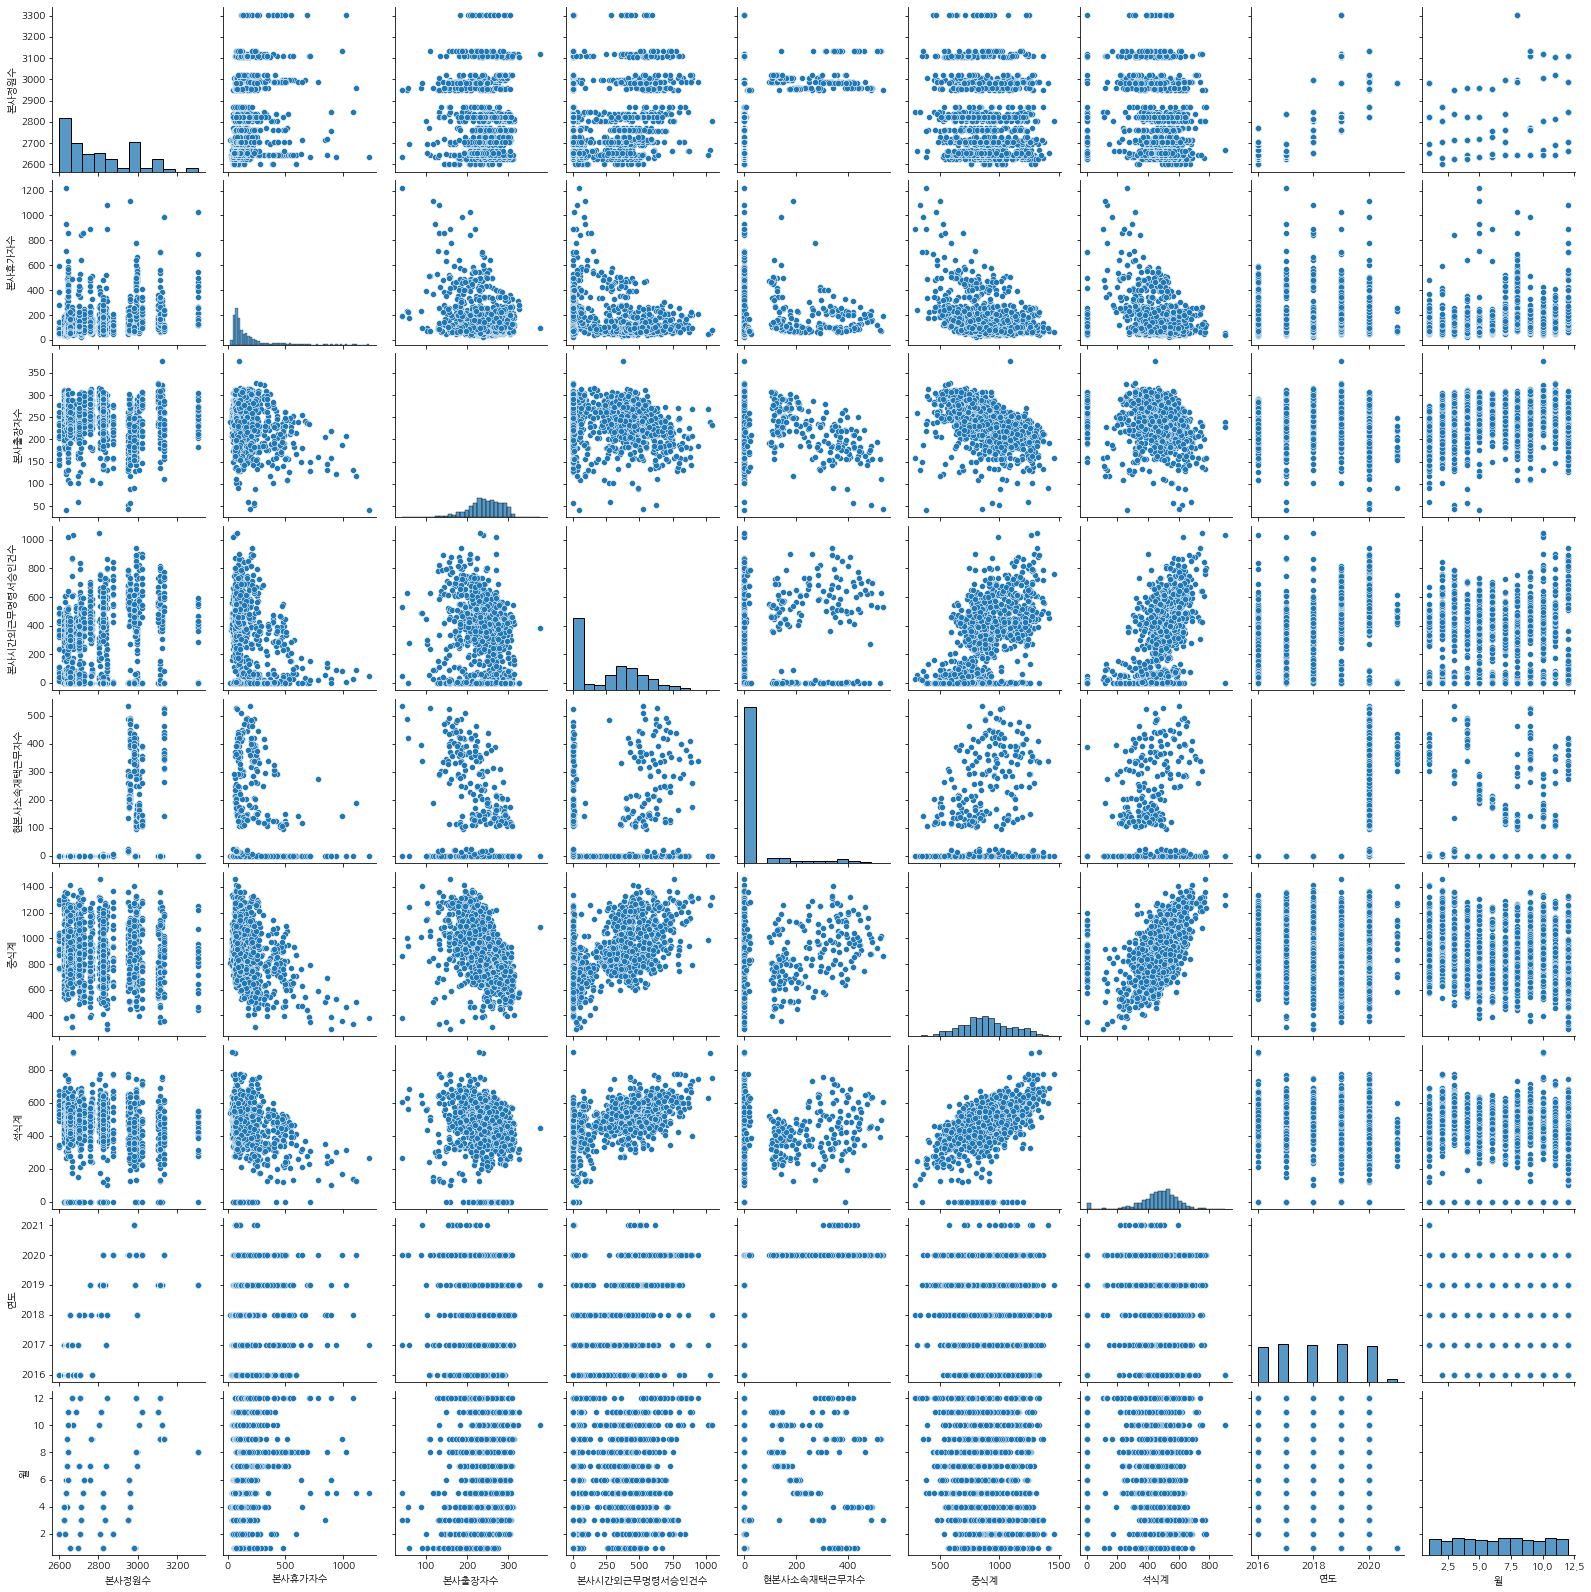

In [64]:
plt.figure(figsize = (10,10))
sns.pairplot(data = train[col_numorbool])

In [65]:
temp = pd.crosstab(index = train.중식_메인반찬_분류, columns = train.요일, values = train.중식계, margins = True, aggfunc = 'mean').round(2)
temp = temp[['월', '화', '수', '목', '금']]
temp

요일,월,화,수,목,금
중식_메인반찬_분류,,,,,
고기류,1142.68,930.42,904.97,830.63,655.89
기타,1159.50,913.40,899.55,775.83,747.67
생선류,1157.67,914.43,886.26,798.67,637.73
야채류,1249.00,1116.00,926.00,910.00,657.00
탄수류,1266.00,871.00,958.44,913.00,661.71
All,1144.33,925.62,905.21,823.99,653.61


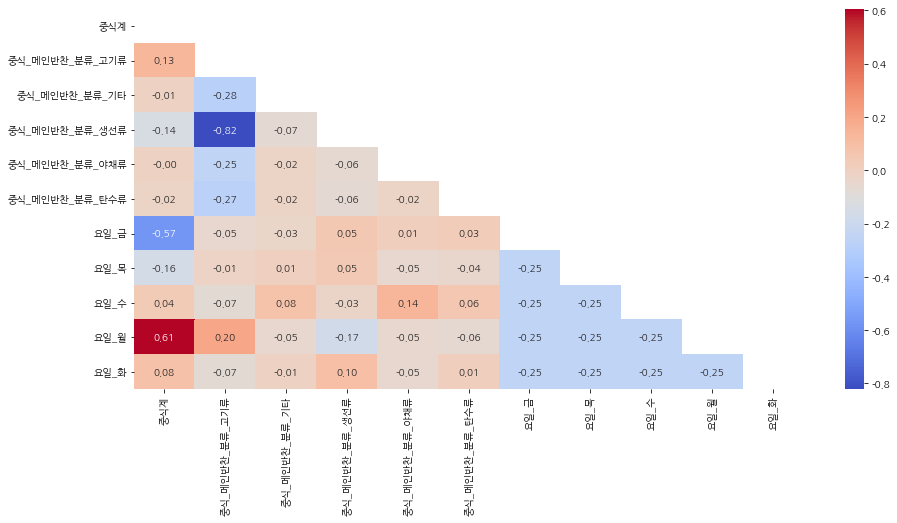

In [66]:
# 반찬 종류와 식수 간 관계 확인하기 위해, one-hot-encoding
ohc = pd.get_dummies(data = train[['중식_메인반찬_분류', '중식계','요일', ]])
corr = ohc.corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize = (15,7))
sns.heatmap(corr, mask = mask, cmap = 'coolwarm', annot = True, fmt = '.2f')

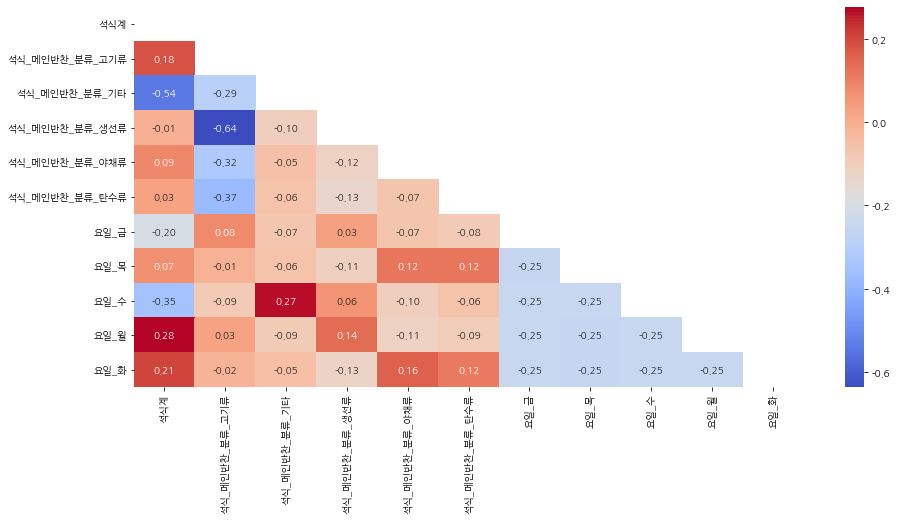

In [67]:
# 반찬 종류와 식수 간 관계 확인하기 위해, one-hot-encoding
ohc = pd.get_dummies(data = train[['석식_메인반찬_분류', '석식계','요일', ]])
corr = ohc.corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize = (15,7))
sns.heatmap(corr, mask = mask, cmap = 'coolwarm', annot = True, fmt = '.2f')

###### 상관관계 분석


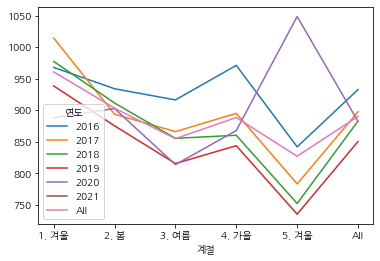

In [68]:
df_temp = pd.crosstab(index = train.계절, columns = train.연도, values = train.중식계, aggfunc = 'mean', margins = True).round(1).copy()
# df_temp = df_temp[['봄','여름', '가을', '겨울']]
df_temp.plot()

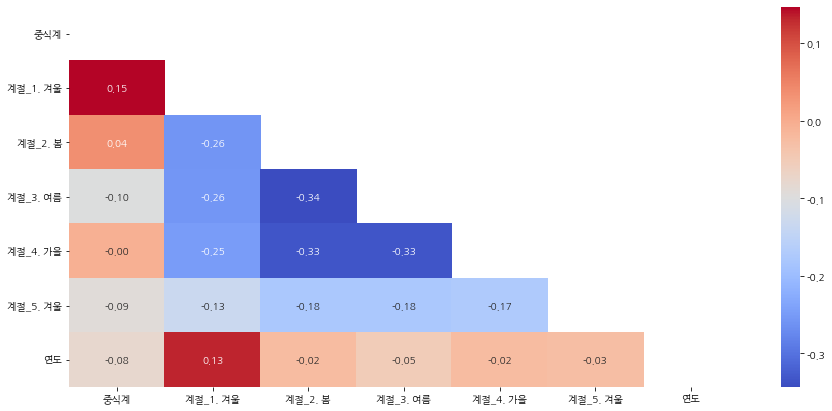

In [69]:
# 계절과 식수 간 관계 확인하기 위해, one-hot-encoding
ohc = pd.concat([pd.get_dummies(data = train[['계절', '중식계']]), train['연도'].astype(int)], axis = 1)
corr = ohc.corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize = (15,7))
sns.heatmap(corr, mask = mask, cmap = 'coolwarm', annot = True, fmt = '.2f')

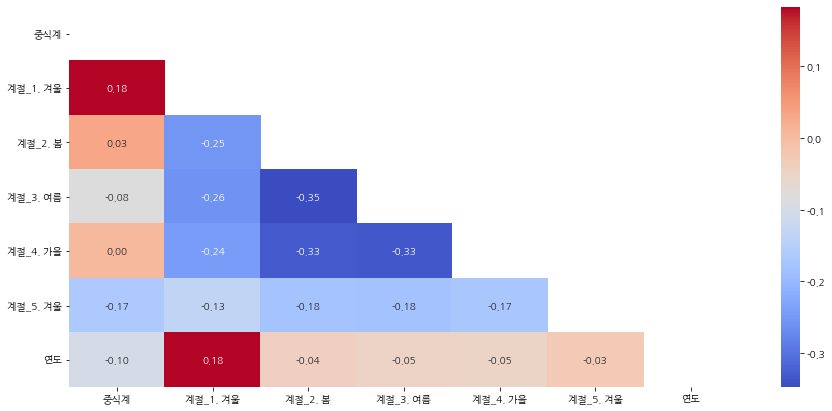

In [70]:
# 만약 소음처럼 튀는 2020년 데이터를 빼 준다면? 
temp_train = train[train.연도!=2020]
ohc = pd.concat([pd.get_dummies(data = temp_train[['계절', '중식계']]), temp_train['연도'].astype(int)], axis = 1)
corr = ohc.corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize = (15,7))
sns.heatmap(corr, mask = mask, cmap = 'coolwarm', annot = True, fmt = '.2f')

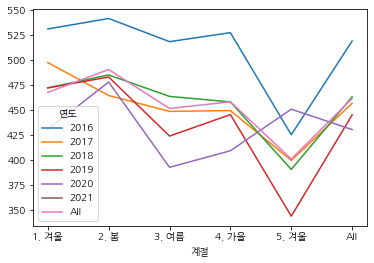

In [71]:
df_temp = pd.crosstab(index = train.계절, columns = train.연도, values = train.석식계, aggfunc = 'mean', margins = True).round(1).copy()
# df_temp = df_temp[['봄','여름', '가을', '겨울']]
df_temp.plot()

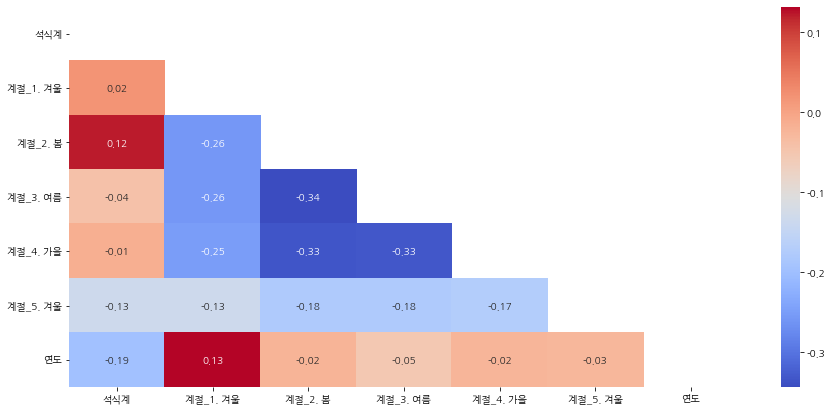

In [72]:
# 계절과 식수 간 관계 확인하기 위해, one-hot-encoding
ohc = pd.concat([pd.get_dummies(data = train[['계절', '석식계']]), train['연도'].astype(int)], axis = 1)
corr = ohc.corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize = (15,7))
sns.heatmap(corr, mask = mask, cmap = 'coolwarm', annot = True, fmt = '.2f')

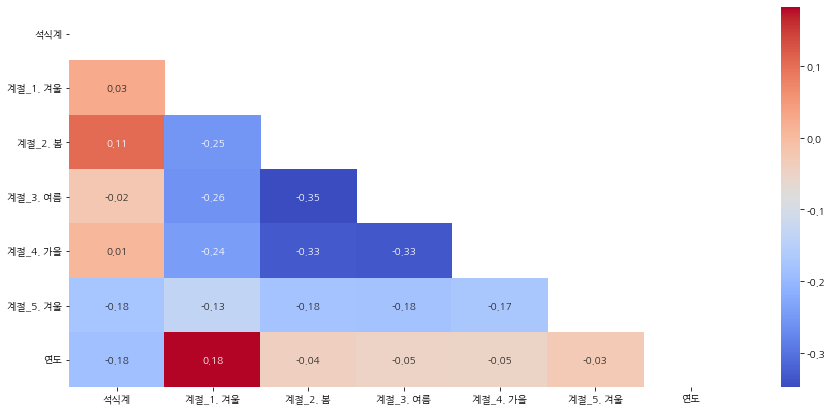

In [73]:
# 만약 소음처럼 튀는 2020년 데이터를 빼 준다면? 
temp_train = train[train.연도!=2020]
ohc = pd.concat([pd.get_dummies(data = temp_train[['계절', '석식계']]), temp_train['연도'].astype(int)], axis = 1)
corr = ohc.corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize = (15,7))
sns.heatmap(corr, mask = mask, cmap = 'coolwarm', annot = True, fmt = '.2f')

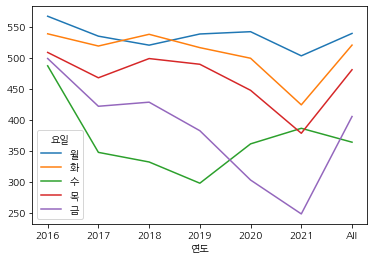

In [74]:
# 요일 별 석식인원 추이
df_temp = pd.crosstab(index = train.연도, columns = train.요일, values = train.석식계, aggfunc = 'mean', margins = True).round(1).copy()
df_temp = df_temp[['월', '화', '수', '목', '금']]
df_temp.plot()

In [75]:
# 

In [76]:
# 

# 알고리즘 불러오기


In [77]:
label_names = ['중식계', '석식계']
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '연도', '월', '일',
       '1601', '계절', '중식_밥류', '중식_국류', '중식_메인반찬', '중식_서브반찬', '중식_메인반찬_분류',
       '석식_밥류', '석식_국류', '석식_메인반찬', '석식_서브반찬', '석식_메인반찬_분류'],
      dtype='object')

In [78]:
# train 데이터 내에서 8:2로 나누어서, 찐 train/test 데이터 나누기로 함. 
len_train = int(len(train)*0.8)
len_train, len(train)

(964, 1205)

In [79]:
train.sample(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,중식_밥류,중식_국류,중식_메인반찬,중식_서브반찬,중식_메인반찬_분류,석식_밥류,석식_국류,석식_메인반찬,석식_서브반찬,석식_메인반찬_분류
254,2017-02-10,금,2632,149,284,59,0.00,모닝롤/꿀호떡 우유/주스 계란후라이 닭죽/쌀밥 (쌀:국내산) 맑은연두부탕 참나...,오곡밥 (쌀:국내산) 소고기무국 굴비구이 홍어무침 보름나물/김구이 포기김치 ...,쌀밥/잡곡밥 (쌀:국내산) 청국장찌개 미니함박조림 감자채볶음 콩나물무침 포기...,...,오곡밥,소고기무국,굴비구이,홍어무침,생선류,쌀밥/잡곡밥,청국장찌개,미니함박조림,감자채볶음,고기류
57,2016-04-27,수,2643,71,234,0,0.00,모닝롤/와플 우유/주스 계란후라이 닭죽/쌀밥 (쌀:국내산) 매운어묵국 감자채볶...,나물비빔밥 (쌀:국내산) 미소장국 궁중떡찜 알감자버터구이 유기농식혜 배추겉절...,쌀밥/잡곡밥 (쌀:국내산) 청국장찌개 코다리무조림 비엔나케찹볶음 참나물 포기...,...,나물비빔밥,미소장국,궁중떡찜,알감자버터구이,탄수류,쌀밥/잡곡밥,청국장찌개,코다리무조림,비엔나케찹볶음,생선류
570,2018-05-29,화,2721,73,258,422,0.00,모닝롤/인절미샌드 우유/주스 스크램블에그 잣죽/쌀밥 (쌀:국내산) 황태국 우엉조...,쌀밥/잡곡밥 김치찌개 해물청경채볶음 버섯잡채 올방개묵무침 알타리김치 (김치...,"볶음밥 (쌀,현미흑미:국내산) 짬뽕 깐풍기 양배추샐러드 조각사과 포기김치 (...",...,쌀밥/잡곡밥,김치찌개,해물청경채볶음,버섯잡채,생선류,볶음밥,짬뽕,깐풍기,양배추샐러드,고기류


In [80]:
train.dtypes

일자                 object
요일                 object
본사정원수               int64
본사휴가자수              int64
본사출장자수              int64
본사시간외근무명령서승인건수      int64
현본사소속재택근무자수       float64
조식메뉴               object
중식메뉴               object
석식메뉴               object
중식계               float64
석식계               float64
연도                 uint16
월                   uint8
일                  object
1601                 bool
계절                 object
중식_밥류              object
중식_국류              object
중식_메인반찬            object
중식_서브반찬            object
중식_메인반찬_분류         object
석식_밥류              object
석식_국류              object
석식_메인반찬            object
석식_서브반찬            object
석식_메인반찬_분류         object
dtype: object

In [81]:
# train 추가 파생변수 생성
train['before2018'] = (train.연도<=2018)

In [82]:
# train['봄']
train['봄'] = (train.계절=='봄')

In [83]:
# train['겨울1']
train['겨울1'] = (train.계절=='겨울1')

In [84]:
# train['겨울2']
train['겨울2'] = (train.계절=='겨울2')

In [85]:
# train['no_dinner_day']
dinner_temp = df_menu_dinner.loc[df_menu_dinner.str_len<=20, 0].unique().tolist()
train['no_dinner_day'] = (train.석식메뉴.isin(dinner_temp))

In [86]:
# train['고기_기타_others']
train['중식_노맛'] = (train.중식_메인반찬_분류 == '기타')
train['석식_노맛'] = (train.석식_메인반찬_분류 == '기타')
train['중식_고기류'] = (train.중식_메인반찬_분류 == '고기류')
train['석식_고기류'] = (train.석식_메인반찬_분류 == '고기류')


In [87]:
# 요일 ohe
train = pd.concat([train, pd.get_dummies(train.요일)], axis = 1)

In [88]:
feature_names = ['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '연도', '월', '일',
       '1601', '계절', '중식_밥류', '중식_국류', '중식_메인반찬', '중식_서브반찬', '중식_메인반찬_분류',
       '석식_밥류', '석식_국류', '석식_메인반찬', '석식_서브반찬', '석식_메인반찬_분류', 'before2018', '봄',
       '겨울1', '겨울2', 'no_dinner_day', '중식_노맛', '석식_노맛', '중식_고기류', '석식_고기류',
       '금', '목', '수', '화']
    
remove_list = ['일자', '요일', '조식메뉴', '중식메뉴', '석식메뉴', '일', '1601', '계절',
               '중식_밥류', '중식_국류', '중식_메인반찬', '중식_서브반찬', '중식_메인반찬_분류', 
               '석식_밥류', '석식_국류', '석식_메인반찬', '석식_서브반찬', '석식_메인반찬_분류',
               ]
feature_names.remove(label_names[0])
feature_names.remove(label_names[1])
for del_feature in remove_list : 
    feature_names.remove(del_feature)

print(feature_names)

['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '연도', '월', 'before2018', '봄', '겨울1', '겨울2', 'no_dinner_day', '중식_노맛', '석식_노맛', '중식_고기류', '석식_고기류', '금', '목', '수', '화']


In [89]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,no_dinner_day,중식_노맛,석식_노맛,중식_고기류,석식_고기류,금,목,수,월,화
0,2016-02-01,월,2601,50,150,238,0.00,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,False,False,False,True,False,0,0,0,1,0
1,2016-02-02,화,2601,50,173,319,0.00,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",...,False,False,False,True,True,0,0,0,0,1
2,2016-02-03,수,2601,56,180,111,0.00,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",...,False,False,False,True,False,0,0,1,0,0
3,2016-02-04,목,2601,104,220,355,0.00,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",...,False,False,False,False,False,0,1,0,0,0
4,2016-02-05,금,2601,278,181,34,0.00,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",...,False,False,False,True,True,1,0,0,0,0


In [90]:
# train/test 데이터
temp = train.copy()
df_train = temp.iloc[:len_train]
df_test = temp.iloc[len_train:]
df_train.shape, df_test.shape

((964, 41), (241, 41))

In [91]:
x_train = df_train[feature_names]
y_train = df_train[label_names]
x_test = df_test[feature_names]
y_test = df_test[label_names]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((964, 21), (964, 2), (241, 21), (241, 2))

In [92]:
x_train.head(3)

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,연도,월,월,before2018,봄,...,겨울2,no_dinner_day,중식_노맛,석식_노맛,중식_고기류,석식_고기류,금,목,수,화
0,2601,50,150,238,0.00,2016,2,1,True,False,...,False,False,False,False,True,False,0,0,0,0
1,2601,50,173,319,0.00,2016,2,0,True,False,...,False,False,False,False,True,True,0,0,0,1
2,2601,56,180,111,0.00,2016,2,0,True,False,...,False,False,False,False,True,False,0,0,1,0


In [93]:
# 월요일 - 몇 월 : 월로 컬럼명 동일해서 바꿔줌
x_train.columns = ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '연도', '몇월',
       '월', 'before2018', '봄', '겨울1', '겨울2', 'no_dinner_day', '중식_노맛', '석식_노맛',
       '중식_고기류', '석식_고기류', '금', '목', '수', '화']
del x_train['몇월']

In [94]:
x_test.columns = ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '연도', '몇월',
       '월', 'before2018', '봄', '겨울1', '겨울2', 'no_dinner_day', '중식_노맛', '석식_노맛',
       '중식_고기류', '석식_고기류', '금', '목', '수', '화']
del x_test['몇월']

In [95]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 963
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   본사정원수           964 non-null    int64  
 1   본사휴가자수          964 non-null    int64  
 2   본사출장자수          964 non-null    int64  
 3   본사시간외근무명령서승인건수  964 non-null    int64  
 4   현본사소속재택근무자수     964 non-null    float64
 5   연도              964 non-null    uint16 
 6   월               964 non-null    uint8  
 7   before2018      964 non-null    bool   
 8   봄               964 non-null    bool   
 9   겨울1             964 non-null    bool   
 10  겨울2             964 non-null    bool   
 11  no_dinner_day   964 non-null    bool   
 12  중식_노맛           964 non-null    bool   
 13  석식_노맛           964 non-null    bool   
 14  중식_고기류          964 non-null    bool   
 15  석식_고기류          964 non-null    bool   
 16  금               964 non-null    uint8  
 17  목               964 non-null    uin

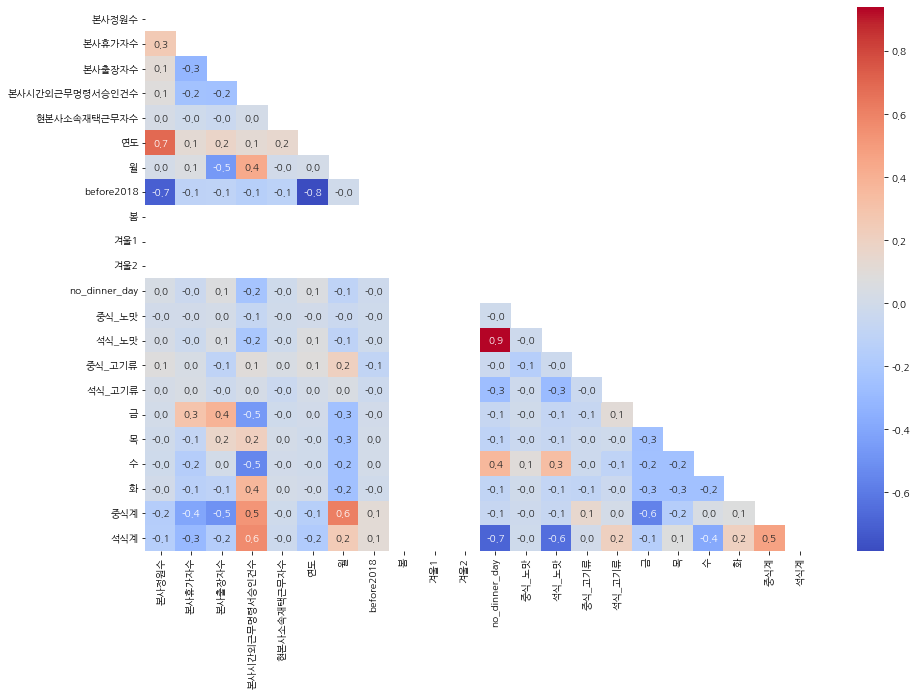

In [96]:
plt.figure(figsize = (15,10))
mask = np.triu(np.ones_like(pd.concat([x_train, y_train], axis = 1).corr()))
sns.heatmap(pd.concat([x_train, y_train], axis = 1).corr(), mask = mask, annot = True, fmt = ',.1f', cmap = 'coolwarm')

결과값이 별로 안 좋아서, 석식이랑 중식 피쳐/label 따로 나눠서 결과 내 보기로 함

In [97]:
# df_train = temp.iloc[:len_train]
# df_test = temp.iloc[len_train:]

In [98]:
feature_names_lunch = ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '월','before2018', 
                       '봄', '겨울1', '겨울2', '금', '목']
feature_names_dinner = ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '연도', '월', 
                        'no_dinner_day','석식_노맛', '금', '수']
label_lunch = '중식계'
label_dinner = '석식계'

In [99]:
xtrain_lunch = df_train[feature_names_lunch]
xtrain_dinner = df_train[feature_names_dinner]
ytrain_lunch = df_train[label_lunch]
ytrain_dinner = df_train[label_dinner]

xtest_lunch = df_test[feature_names_lunch]
xtest_dinner = df_test[feature_names_dinner]
ytest_lunch = df_test[label_lunch]
ytest_dinner = df_test[label_dinner]

xtrain_lunch.shape, ytrain_lunch.shape, xtrain_dinner.shape, ytrain_dinner.shape, xtest_lunch.shape, ytest_lunch.shape, xtest_dinner.shape, ytest_dinner.shape

((964, 12), (964,), (964, 11), (964,), (241, 12), (241,), (241, 11), (241,))

In [100]:
import tensorflow as tf
import tensorflow.keras

###### 딥레닝 레이어 만들기

In [101]:
# input shape
input_shape = x_train.shape[1]
input_shape

20

In [102]:
# 입력 레이어를 Input 레이어로 사용할 수도 있습니다.  tf.keras.layers.Input(shape=(input_shape))
# 분류와 똑같지만 회귀는 출력을 하나로 합니다.  tf.keras.layers.Dense(1)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128, activation = 'leaky_relu', input_shape = [input_shape]), 
                                    tf.keras.layers.Dense(128, activation = 'relu'), 
                                    tf.keras.layers.Dense(8, activation = 'swish'), 
                                    tf.keras.layers.Dropout(0.2), 
                                    tf.keras.layers.Dense(64, activation = 'leaky_relu'), 
                                    tf.keras.layers.Dense(128, activation = 'relu'), 
                                    tf.keras.layers.Dense(64, activation = 'swish'), 
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(2) 
])
model

###### 모델 컴파일

In [103]:
# optimizers
print(dir(tf.keras.optimizers))

['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'Ftrl', 'Nadam', 'Optimizer', 'RMSprop', 'SGD', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sys', 'deserialize', 'get', 'schedules', 'serialize']


In [104]:
# opti_list = ['Adam', 'Adamax', 'SGD', 'RMSprop', 'Optimizer']
optimizer = tf.keras.optimizers.Adamax(0.001)

In [105]:
# loss function
# loss_list = ['mse', 'mae', 'huber', 'quantile']
loss = 'huber'

In [106]:
# metrics
metrics = ['mae', 'mse']

In [107]:
# 컴파일
model.compile(optimizer = optimizer,
              loss = loss, 
              metrics = metrics)

# model.compile(loss = 'huber', 
#              optimizer = optimizer, 
#              metrics = ['mae', 'mse'])

model

In [108]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2688      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 8)                 1032      
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 64)                576       
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 64)                8

###### training

In [109]:
# 에포크마다 훈련 상태 점검위해 EarlyStopping 콜백 사용함.
# 지정된 에포크 횟수 동안 성능 향상 없으면 자동으로 훈련 멈춤
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 100, )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f505865b810>,
      dtype=object)

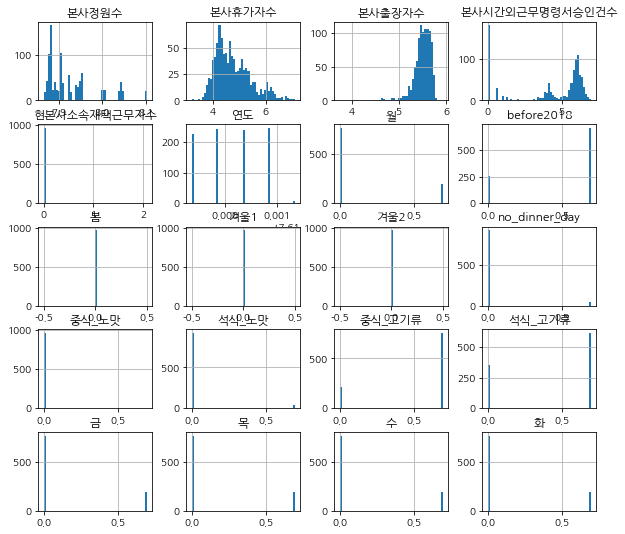

In [110]:
temp = x_train.copy()
for feature in temp.columns.tolist():
    temp[feature] = np.log1p(temp[feature])

temp.hist(bins = 50, figsize = (10,9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5057403e90>,
      dtype=object)

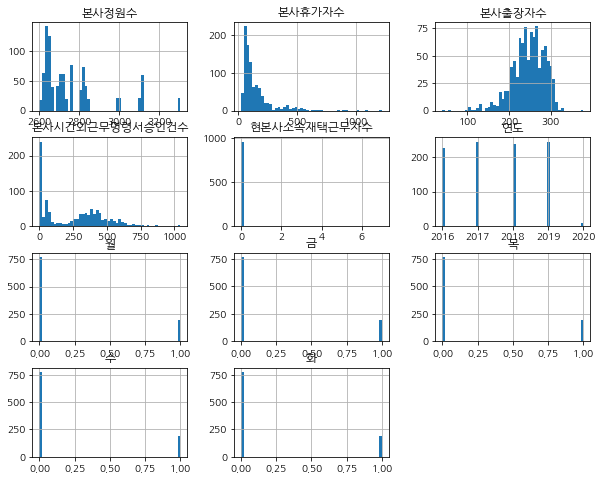

In [111]:
x_train.hist(bins = 50, figsize = (10,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50577a7b50>,
      dtype=object)

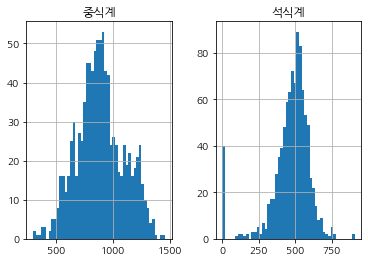

In [112]:
y_train.hist(bins =50)

In [113]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 963
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   본사정원수           964 non-null    int64  
 1   본사휴가자수          964 non-null    int64  
 2   본사출장자수          964 non-null    int64  
 3   본사시간외근무명령서승인건수  964 non-null    int64  
 4   현본사소속재택근무자수     964 non-null    float64
 5   연도              964 non-null    uint16 
 6   월               964 non-null    uint8  
 7   before2018      964 non-null    bool   
 8   봄               964 non-null    bool   
 9   겨울1             964 non-null    bool   
 10  겨울2             964 non-null    bool   
 11  no_dinner_day   964 non-null    bool   
 12  중식_노맛           964 non-null    bool   
 13  석식_노맛           964 non-null    bool   
 14  중식_고기류          964 non-null    bool   
 15  석식_고기류          964 non-null    bool   
 16  금               964 non-null    uint8  
 17  목               964 non-null    uin

In [114]:
bcols = x_train.select_dtypes(include = 'bool').columns.tolist()
for column in bcols : 
    x_train[column] = x_train[column].astype(int)
x_train[bcols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 963
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   before2018     964 non-null    int64
 1   봄              964 non-null    int64
 2   겨울1            964 non-null    int64
 3   겨울2            964 non-null    int64
 4   no_dinner_day  964 non-null    int64
 5   중식_노맛          964 non-null    int64
 6   석식_노맛          964 non-null    int64
 7   중식_고기류         964 non-null    int64
 8   석식_고기류         964 non-null    int64
dtypes: int64(9)
memory usage: 75.3 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
# 모델 학습
x_train = np.asarray(x_train).astype(np.int)
y_train = np.asarray(y_train).astype(np.int)
history = model.fit(x_train, y_train, 
                    epochs = 1000, validation_split = 0.2,
                    callbacks = early_stop )
history

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

Epoch 1/1000
25/25 [==============================] - 1s 14ms/step - loss: 415.0273 - mae: 415.5269 - mse: 261098.2500 - val_loss: 150.7871 - val_mae: 151.2860 - val_mse: 34840.3203
Epoch 2/1000
25/25 [==============================] - 0s 5ms/step - loss: 237.4303 - mae: 237.9301 - mse: 96347.0156 - val_loss: 137.3252 - val_mae: 137.8232 - val_mse: 33379.2305
Epoch 3/1000
25/25 [==============================] - 0s 4ms/step - loss: 191.2819 - mae: 191.7808 - mse: 65356.3633 - val_loss: 129.3507 - val_mae: 129.8504 - val_mse: 29061.9668
Epoch 4/1000
25/25 [==============================] - 0s 4ms/step - loss: 184.7278 - mae: 185.2271 - mse: 63198.4688 - val_loss: 121.7700 - val_mae: 122.2699 - val_mse: 25857.4785
Epoch 5/1000
25/25 [==============================] - 0s 4ms/step - loss: 169.7578 - mae: 170.2561 - mse: 51483.1797 - val_loss: 119.0629 - val_mae: 119.5627 - val_mse: 24949.2695
Epoch 6/1000
25/25 [==============================] - 0s 4ms/step - loss: 161.2390 - mae: 161.7382

In [116]:
len(history.history.values())

6

In [117]:
# history : df로
df_hist = pd.DataFrame(history.history)
df_hist.sample(5)

,loss,mae,mse,val_loss,val_mae,val_mse
154,115.02,115.52,26283.31,146.88,147.38,33003.79
157,113.72,114.22,26164.24,134.21,134.71,28884.31
52,126.05,126.55,30228.67,111.55,112.05,24287.20
9,156.57,157.07,45103.62,113.50,114.00,25393.43
22,146.65,147.15,39321.70,99.19,99.69,18899.83


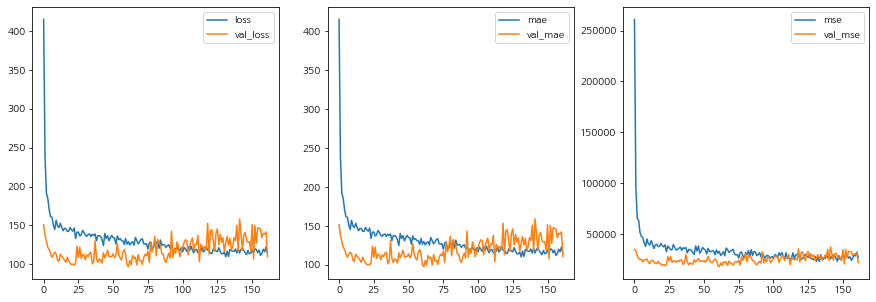

In [118]:
# 학습결과를 시각화 합니다.
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
df_hist[['loss', 'val_loss']].plot(ax = axes[0])
df_hist[['mae', 'val_mae']].plot(ax = axes[1])
df_hist[['mse', 'val_mse']].plot(ax = axes[2])

In [119]:
x_test = np.asarray(x_test).astype(np.int)
y_predict = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


중식계 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               1664      
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 8)                 1032      
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 64)                576       
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 64)               

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

25/25 [==============================] - 1s 12ms/step - loss: 587.5419 - mae: 588.0419 - mse: 453065.7188 - val_loss: 203.6883 - val_mae: 204.1875 - val_mse: 60325.7266
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 305.3788 - mae: 305.8785 - mse: 155627.0781 - val_loss: 178.4688 - val_mae: 178.9688 - val_mse: 46283.9375
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 239.8838 - mae: 240.3832 - mse: 97532.0078 - val_loss: 163.0527 - val_mae: 163.5527 - val_mse: 39478.8164
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 229.0961 - mae: 229.5949 - mse: 87502.4922 - val_loss: 156.7546 - val_mae: 157.2546 - val_mse: 36125.6133
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 213.9114 - mae: 214.4111 - mse: 75483.3359 - val_loss: 151.4179 - val_mae: 151.9179 - val_mse: 35172.8281
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 204.6507 - mae: 205.1506 - mse: 68006.367

,loss,mae,mse,val_loss,val_mae,val_mse
92,131.66,132.16,29954.49,106.39,106.89,20124.34
87,137.92,138.42,31962.48,108.32,108.82,20832.43
74,141.21,141.71,31970.35,109.85,110.35,21108.80
93,139.88,140.38,32334.34,119.11,119.61,25134.72
54,156.76,157.25,38767.49,122.18,122.68,22377.82


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


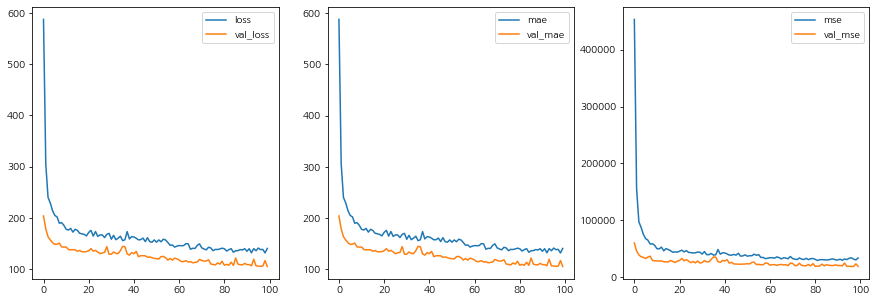

In [120]:
# input shape
input_shape = xtrain_lunch.shape[1]

# 입력 레이어를 Input 레이어로 사용할 수도 있습니다.  tf.keras.layers.Input(shape=(input_shape))
# 분류와 똑같지만 회귀는 출력을 하나로 합니다.  tf.keras.layers.Dense(1)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128, activation = 'leaky_relu', input_shape = [input_shape]), 
                                    tf.keras.layers.Dense(128, activation = 'relu'), 
                                    tf.keras.layers.Dense(8, activation = 'swish'), 
                                    tf.keras.layers.Dropout(0.2), 
                                    tf.keras.layers.Dense(64, activation = 'leaky_relu'), 
                                    tf.keras.layers.Dense(128, activation = 'relu'), 
                                    tf.keras.layers.Dense(64, activation = 'swish'), 
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(1) 
])

# opti_list = ['Adam', 'Adamax', 'SGD', 'RMSprop', 'Optimizer']
optimizer = tf.keras.optimizers.Adamax(0.001)
# loss function
# loss_list = ['mse', 'mae', 'huber', 'quantile']
loss = 'huber'
# metrics
metrics = ['mae', 'mse']
# 컴파일
model.compile(optimizer = optimizer,
              loss = loss, 
              metrics = metrics)
# 모델 요약
print(model.summary())

xtrain_lunch = np.asarray(xtrain_lunch).astype(np.int)
ytrain_lunch = np.asarray(ytrain_lunch).astype(np.int)

# training
# 에포크마다 훈련 상태 점검위해 EarlyStopping 콜백 사용함.
# 지정된 에포크 횟수 동안 성능 향상 없으면 자동으로 훈련 멈춤
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 100, )
# 모델 학습
history = model.fit(xtrain_lunch, ytrain_lunch, 
                    epochs = 100, validation_split = 0.2,
                    callbacks = early_stop )
# history : df로
df_hist = pd.DataFrame(history.history)
display(df_hist.sample(5))
# 학습결과를 시각화 합니다.
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
display(df_hist[['loss', 'val_loss']].plot(ax = axes[0]))
display(df_hist[['mae', 'val_mae']].plot(ax = axes[1]))
display(df_hist[['mse', 'val_mse']].plot(ax = axes[2]))

xtest_lunch = np.asarray(xtest_lunch).astype(np.int)
y_predict_lunch = model.predict(xtest_lunch)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               1536      
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 8)                 1032      
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0         
                                                                 
 dense_17 (Dense)            (None, 64)                576       
                                                                 
 dense_18 (Dense)            (None, 128)               8320      
                                                                 
 dense_19 (Dense)            (None, 64)               

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

25/25 [==============================] - 1s 12ms/step - loss: 195.9417 - mae: 196.4399 - mse: 63904.5391 - val_loss: 97.1385 - val_mae: 97.6378 - val_mse: 19010.9492
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 133.6374 - mae: 134.1363 - mse: 33569.1758 - val_loss: 97.5551 - val_mae: 98.0551 - val_mse: 16768.6250
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 126.0653 - mae: 126.5640 - mse: 31663.5000 - val_loss: 93.5401 - val_mae: 94.0393 - val_mse: 15334.2744
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 118.5960 - mae: 119.0955 - mse: 27265.3418 - val_loss: 72.7664 - val_mae: 73.2634 - val_mse: 13602.9844
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 113.5529 - mae: 114.0506 - mse: 25657.7930 - val_loss: 72.7379 - val_mae: 73.2342 - val_mse: 12160.0605
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 107.9795 - mae: 108.4780 - mse: 22785.1934 - val_loss

,loss,mae,mse,val_loss,val_mae,val_mse
96,96.26,96.76,19725.67,100.73,101.23,15353.02
42,91.94,92.43,18284.08,89.40,89.90,13596.84
59,97.91,98.41,19760.97,93.76,94.26,14262.06
98,97.77,98.27,20491.00,79.62,80.12,12301.26
94,89.40,89.90,17266.19,103.54,104.04,15841.70


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


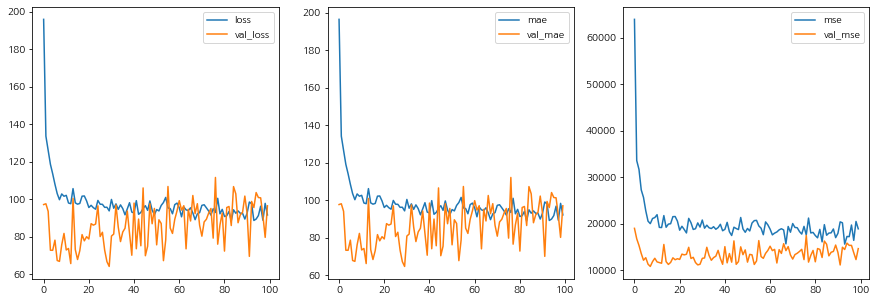

In [121]:
# input shape
input_shape = xtrain_dinner.shape[1]

# 입력 레이어를 Input 레이어로 사용할 수도 있습니다.  tf.keras.layers.Input(shape=(input_shape))
# 분류와 똑같지만 회귀는 출력을 하나로 합니다.  tf.keras.layers.Dense(1)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128, activation = 'leaky_relu', input_shape = [input_shape]), 
                                    tf.keras.layers.Dense(128, activation = 'relu'), 
                                    tf.keras.layers.Dense(8, activation = 'swish'), 
                                    tf.keras.layers.Dropout(0.2), 
                                    tf.keras.layers.Dense(64, activation = 'leaky_relu'), 
                                    tf.keras.layers.Dense(128, activation = 'relu'), 
                                    tf.keras.layers.Dense(64, activation = 'swish'), 
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(1) 
])

# opti_list = ['Adam', 'Adamax', 'SGD', 'RMSprop', 'Optimizer']
optimizer = tf.keras.optimizers.Adamax(0.001)
# loss function
# loss_list = ['mse', 'mae', 'huber', 'quantile']
loss = 'huber'
# metrics
metrics = ['mae', 'mse']
# 컴파일
model.compile(optimizer = optimizer,
              loss = loss, 
              metrics = metrics)
# 모델 요약
print(model.summary())

xtrain_dinner = np.asarray(xtrain_dinner).astype(np.int)
ytrain_dinner = np.asarray(ytrain_dinner).astype(np.int)

# training
# 에포크마다 훈련 상태 점검위해 EarlyStopping 콜백 사용함.
# 지정된 에포크 횟수 동안 성능 향상 없으면 자동으로 훈련 멈춤
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 100, )
# 모델 학습
history = model.fit(xtrain_dinner, ytrain_dinner, 
                    epochs = 100, validation_split = 0.2,
                    callbacks = early_stop )
# history : df로
df_hist = pd.DataFrame(history.history)
display(df_hist.sample(5))
# 학습결과를 시각화 합니다.
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
display(df_hist[['loss', 'val_loss']].plot(ax = axes[0]))
display(df_hist[['mae', 'val_mae']].plot(ax = axes[1]))
display(df_hist[['mse', 'val_mse']].plot(ax = axes[2]))

xtest_dinner = np.asarray(xtest_dinner).astype(np.int)
y_predict_dinner = model.predict(xtest_dinner)

In [122]:
df_result = y_test.reset_index(drop = True)
df_result

,중식계,석식계
0,820.00,272.00
1,633.00,350.00
2,761.00,457.00
3,696.00,344.00
4,1075.00,439.00
...,...,...
236,1093.00,421.00
237,832.00,353.00
238,579.00,217.00
239,1145.00,502.00


In [123]:
df_result = pd.concat([df_result, pd.DataFrame(y_predict_lunch.round(0))], axis = 1)
df_result = pd.concat([df_result, pd.DataFrame(y_predict_dinner.round(0))], axis = 1)
df_result.columns = ['중식계', '석식계', '중식pred', '석식pred']
df_result.head()

,중식계,석식계,중식pred,석식pred
0,820.00,272.00,848.00,414.00
1,633.00,350.00,774.00,338.00
2,761.00,457.00,831.00,413.00
3,696.00,344.00,571.00,317.00
4,1075.00,439.00,942.00,439.00


In [124]:
df_result['e_lunch'] = df_result.중식pred - df_result.중식계
df_result['se_lunch'] = df_result.e_lunch **2
df_result['e_dinner'] = df_result.석식pred - df_result.석식계
df_result['se_dinner'] = df_result.e_dinner **2
df_result.head()

,중식계,석식계,중식pred,석식pred,e_lunch,se_lunch,e_dinner,se_dinner
0,820.00,272.00,848.00,414.00,28.00,784.00,142.00,20164.00
1,633.00,350.00,774.00,338.00,141.00,19881.00,-12.00,144.00
2,761.00,457.00,831.00,413.00,70.00,4900.00,-44.00,1936.00
3,696.00,344.00,571.00,317.00,-125.00,15625.00,-27.00,729.00
4,1075.00,439.00,942.00,439.00,-133.00,17689.00,0.00,0.00


In [125]:
df_result_both = pd.concat([y_test.reset_index(drop = True), pd.DataFrame(y_predict.round(0))], axis = 1)
df_result_both.columns = ['중식계', '석식계', '중식pred', '석식pred']
df_result_both['e_lunch'] = df_result_both.중식pred - df_result_both.중식계
df_result_both['se_lunch'] = df_result_both.e_lunch **2
df_result_both['e_dinner'] = df_result_both.석식pred - df_result_both.석식계
df_result_both['se_dinner'] = df_result_both.e_dinner **2
df_result_both

,중식계,석식계,중식pred,석식pred,e_lunch,se_lunch,e_dinner,se_dinner
0,820.00,272.00,817.00,451.00,-3.00,9.00,179.00,32041.00
1,633.00,350.00,729.00,402.00,96.00,9216.00,52.00,2704.00
2,761.00,457.00,803.00,443.00,42.00,1764.00,-14.00,196.00
3,696.00,344.00,588.00,325.00,-108.00,11664.00,-19.00,361.00
4,1075.00,439.00,919.00,506.00,-156.00,24336.00,67.00,4489.00
...,...,...,...,...,...,...,...,...
236,1093.00,421.00,734.00,403.00,-359.00,128881.00,-18.00,324.00
237,832.00,353.00,771.00,425.00,-61.00,3721.00,72.00,5184.00
238,579.00,217.00,580.00,320.00,1.00,1.00,103.00,10609.00
239,1145.00,502.00,959.00,527.00,-186.00,34596.00,25.00,625.00


In [126]:
mse_lunch = df_result.se_lunch.mean()
mse_dinner = df_result.se_dinner.mean()
mse_lunch, mse_dinner

(17954.08298755187, 10665.01244813278)

In [127]:
mse_lunch_both = df_result_both.se_lunch.mean()
mse_dinner_both = df_result_both.se_dinner.mean()
mse_lunch_both, mse_dinner_both

(34144.81742738589, 8347.58091286307)